<a href="https://colab.research.google.com/github/Shubham-Nimbalkar/data-visualization-project/blob/main/Data_Visualization_(G2_B2)_Group_11_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trending YouTube Videos
![](https://drive.google.com/uc?export=view&id=1c8WjAXo9I0N3bEUf3y_BUP8_SEEwFj2q)

# Goals of the analysis
We want to answer questions like:

* How many views do our trending videos have? Do most of them have a large number of views? Is having a large number of views required for a video to become trending?
* The same questions above, but applied to likes and comment count instead of views.
* Which video remained the most on the trendin-videos list?
* How many trending videos contain a fully-capitalized word in their titles?
* What are the lengths of trending video titles? Is this length related to the video becoming trendy?
* How are views, likes, dislikes, comment count, title length, and other attributes correlate with (relate to) each other? How are they connected?
* What are the most common words in trending video titles?
* Which YouTube channels have the largest number of trending videos?
* Which video category (e.g. Entertainment, Gaming, Comedy, etc.) has the largest number of trending videos?
* When were trending videos published? On which days of the week? at which times of the day?


# Table of contents
* Importing packages
* Reading the dataset
* Data cleaning
* Describtion of numerical columns
    * Views histogram
    * Likes histogram
    * Comment count histogram
* Description on non-numerical columns
* How many trending video titles contain capitalized word?
* Video title lengths
* Correlation between dataset variables
* Most common words in video titles
* Which channels have the largest number of trending videos?
* Which video category has the largest number of trending videos?
* Trending videos and their publishing time
* How many trending videos have an error?
* How many trending videos have their commets disabled?
* How many trending videos have their ratings disabled?
* How many videos have both comments and ratings disabled?
* Conclusions

In [573]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing packages

In [574]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from collections import Counter
import datetime
import wordcloud

# Reading the dataset

In [575]:
df = pd.read_csv("/content/drive/My Drive/DV PROJECT/videos.csv")

In [576]:
#We set some configuration options just for improving visualization graphs
PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format = '{:.2f}'.format
sns.set(style="ticks")
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)

In [577]:
df.head()

,trending_date,title,channel_title,publish_time,views,likes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description
0,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13T17:13:01.000Z,748374,57527,15954,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,2017-11-13T07:30:00.000Z,2418783,97185,12703,False,False,False,"One year after the presidential election, John..."
2,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,2017-11-12T19:05:24.000Z,3191434,146033,8181,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,2017-11-13T11:00:04.000Z,343168,10172,2146,False,False,False,Today we find out if Link is a Nickelback amat...
4,17.14.11,I Dare You: GOING BALD!?,nigahiga,2017-11-12T18:01:41.000Z,2095731,132235,17518,False,False,False,I know it's been a while since we did this sho...


In [578]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   trending_date           40949 non-null  object
 1   title                   40949 non-null  object
 2   channel_title           40949 non-null  object
 3   publish_time            40949 non-null  object
 4   views                   40949 non-null  int64 
 5   likes                   40949 non-null  int64 
 6   comment_count           40949 non-null  int64 
 7   comments_disabled       40949 non-null  bool  
 8   ratings_disabled        40949 non-null  bool  
 9   video_error_or_removed  40949 non-null  bool  
 10  description             40379 non-null  object
dtypes: bool(3), int64(3), object(5)
memory usage: 2.6+ MB


# Data cleaning

In [579]:
df[df['description'].apply(lambda x: pd.isna(x))].head(3)

,trending_date,title,channel_title,publish_time,views,likes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description
42,17.14.11,Dennis Smith Jr. and LeBron James go back and ...,Ben Rohrbach,2017-11-13T15:11:00.000Z,945,7,8,False,False,False,NaN
47,17.14.11,Stephon Marbury and Jimmer Fredette fight in C...,NBA Highlights · YouTube,2017-11-10T18:23:05.000Z,956169,2017,1447,False,False,False,NaN
175,17.14.11,Sphaera - demonstrating interaction,Jenny Hanell,2017-11-04T20:48:16.000Z,1827,3,2,False,False,False,NaN


In [580]:
df['description']= df['description'].fillna(value='')

# Dataset collection years

In [581]:
cdf1 = df["trending_date"].apply(lambda x: '20' + x[:2]).value_counts()
print(cdf1)

2018    31349
2017     9600
Name: trending_date, dtype: int64


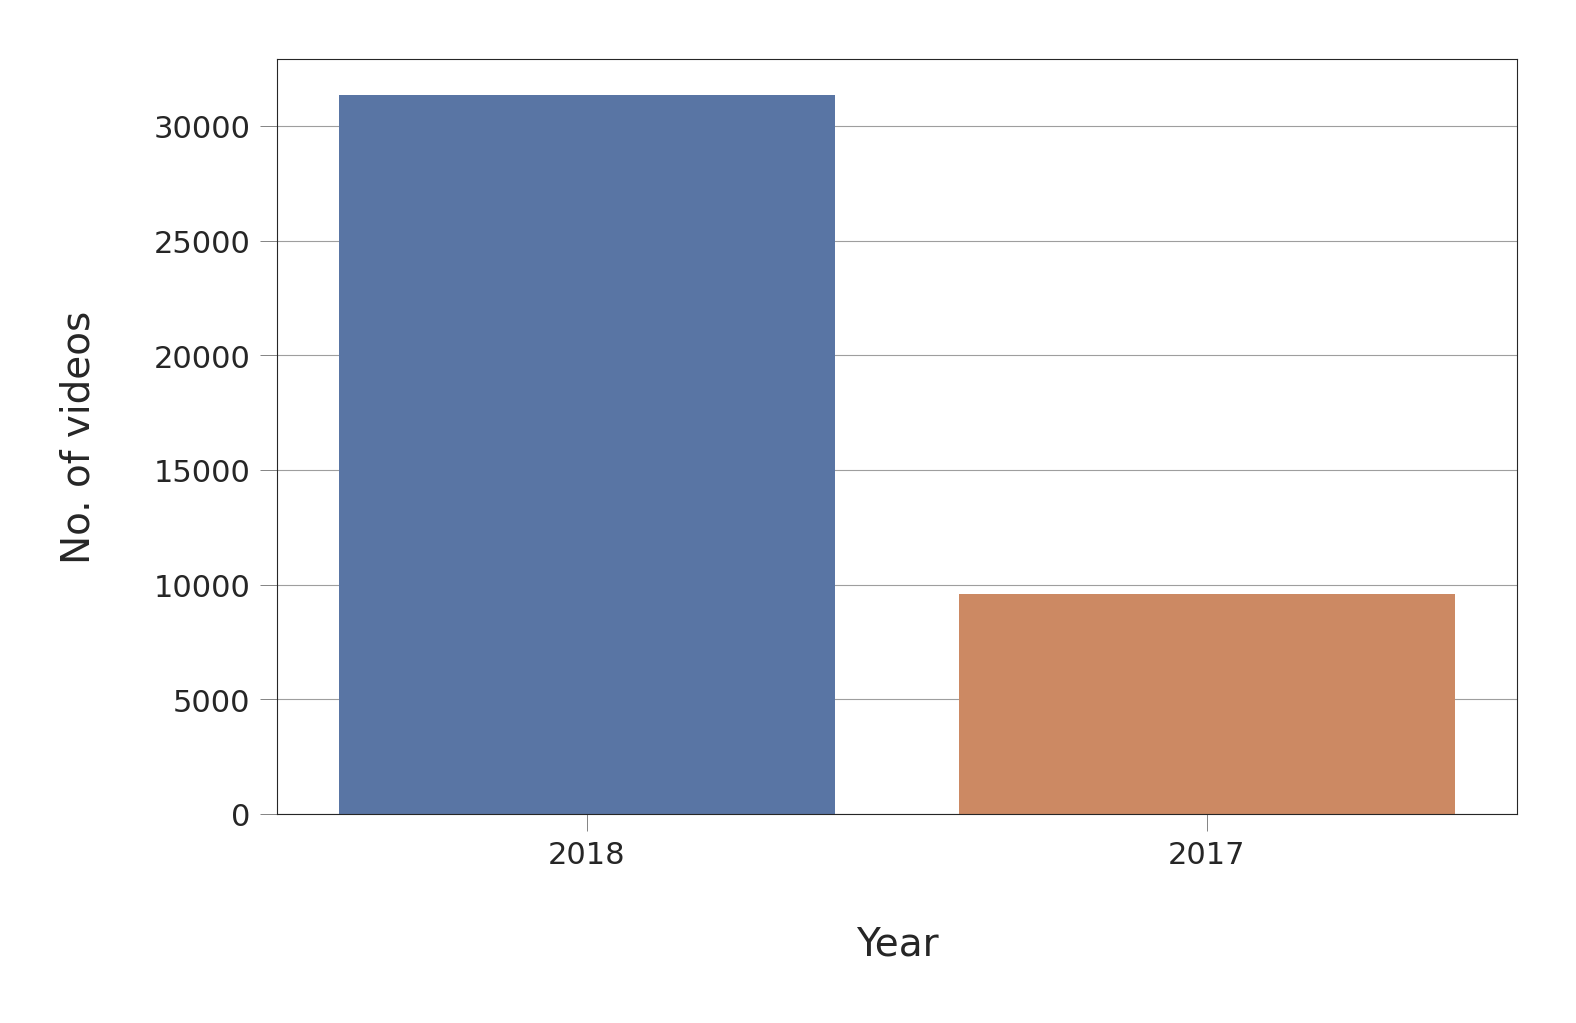

In [582]:
cdf = df["trending_date"].apply(lambda x: '20' + x[:2]).value_counts().to_frame().reset_index().rename(columns={"index": "year", "trending_date": "No_of_videos"})
fig, ax = plt.subplots()
_=sns.barplot(x="year", y="No_of_videos", data=cdf, ax=ax)
_=ax.set(xlabel="Year", ylabel="No. of videos")

In [583]:
df['trending_date'].apply(lambda x: '20' + x[:2]).value_counts(normalize=True)

2018   0.77
2017   0.23
Name: trending_date, dtype: float64

# Describtion of numerical columns

In [584]:
df.describe()

,views,likes,comment_count
count,40949.00,40949.00,40949.00
mean,2360784.64,74266.70,8446.80
std,7394113.76,228885.34,37430.49
min,549.00,0.00,0.00
25%,242329.00,5424.00,614.00
50%,681861.00,18091.00,1856.00
75%,1823157.00,55417.00,5755.00
max,225211923.00,5613827.00,1361580.00


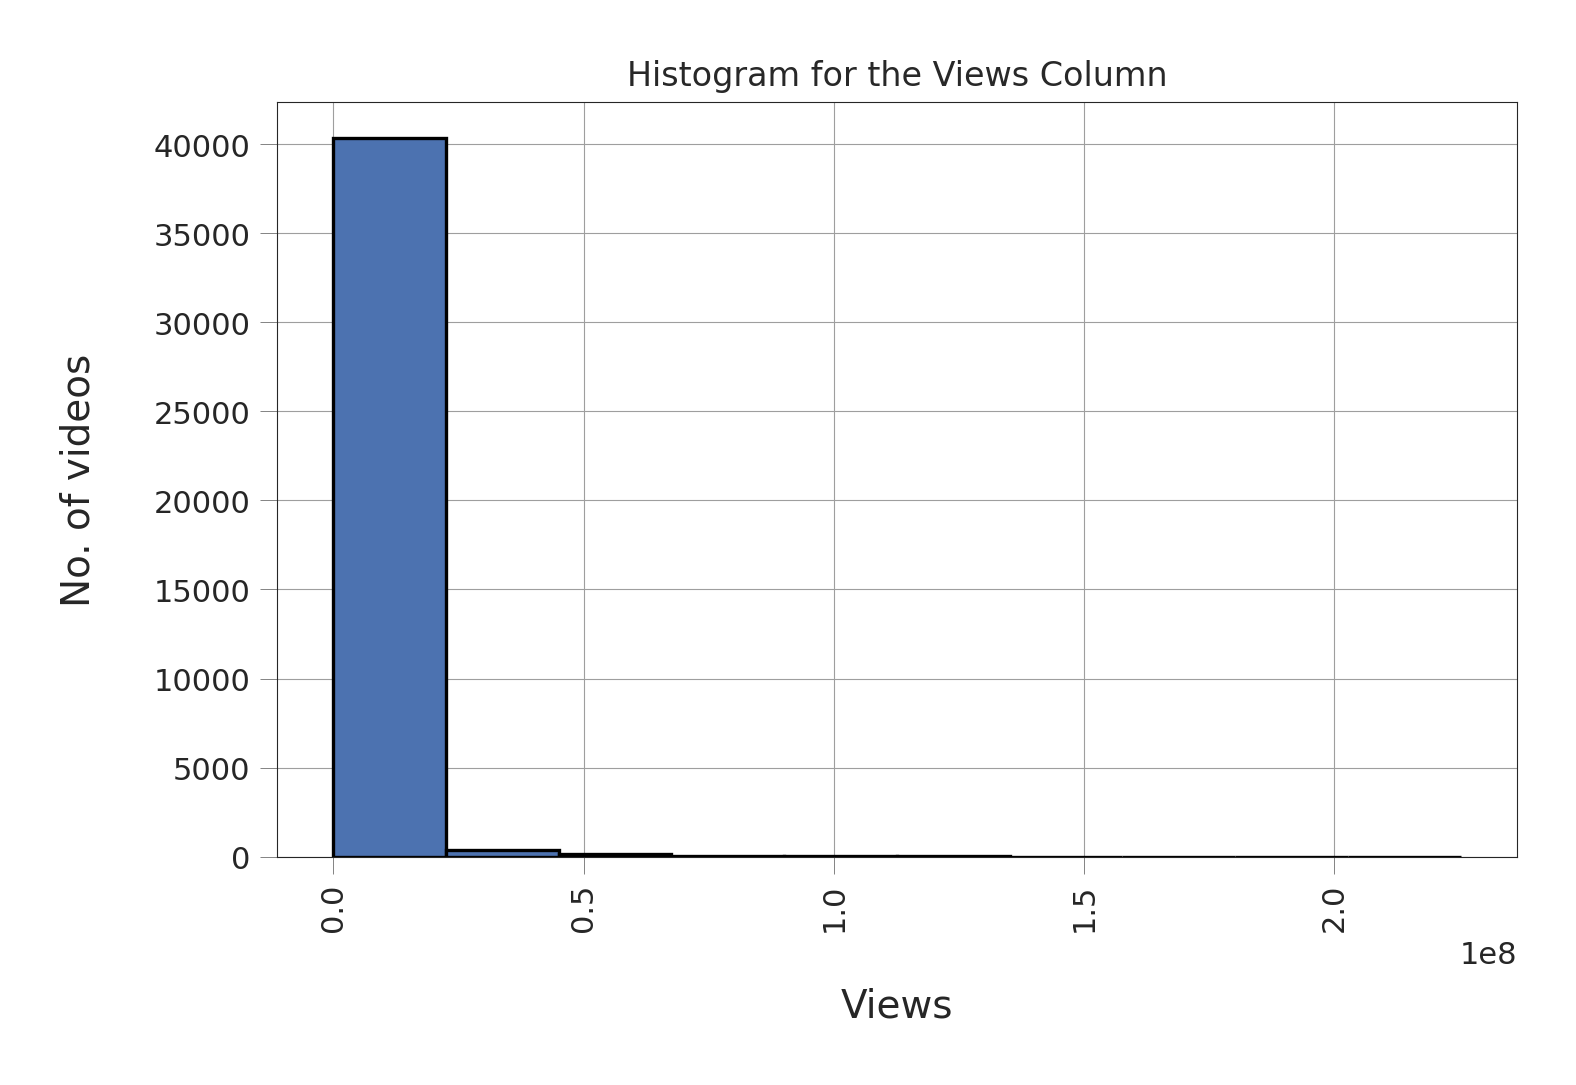

In [585]:
plt.xlabel("Views")
plt.ylabel("No. of videos")
plt.xticks(rotation=90)
plt.hist(df["views"],edgecolor='black',linewidth=1.2)
plt.title("Histogram for the Views Column")
plt.show()

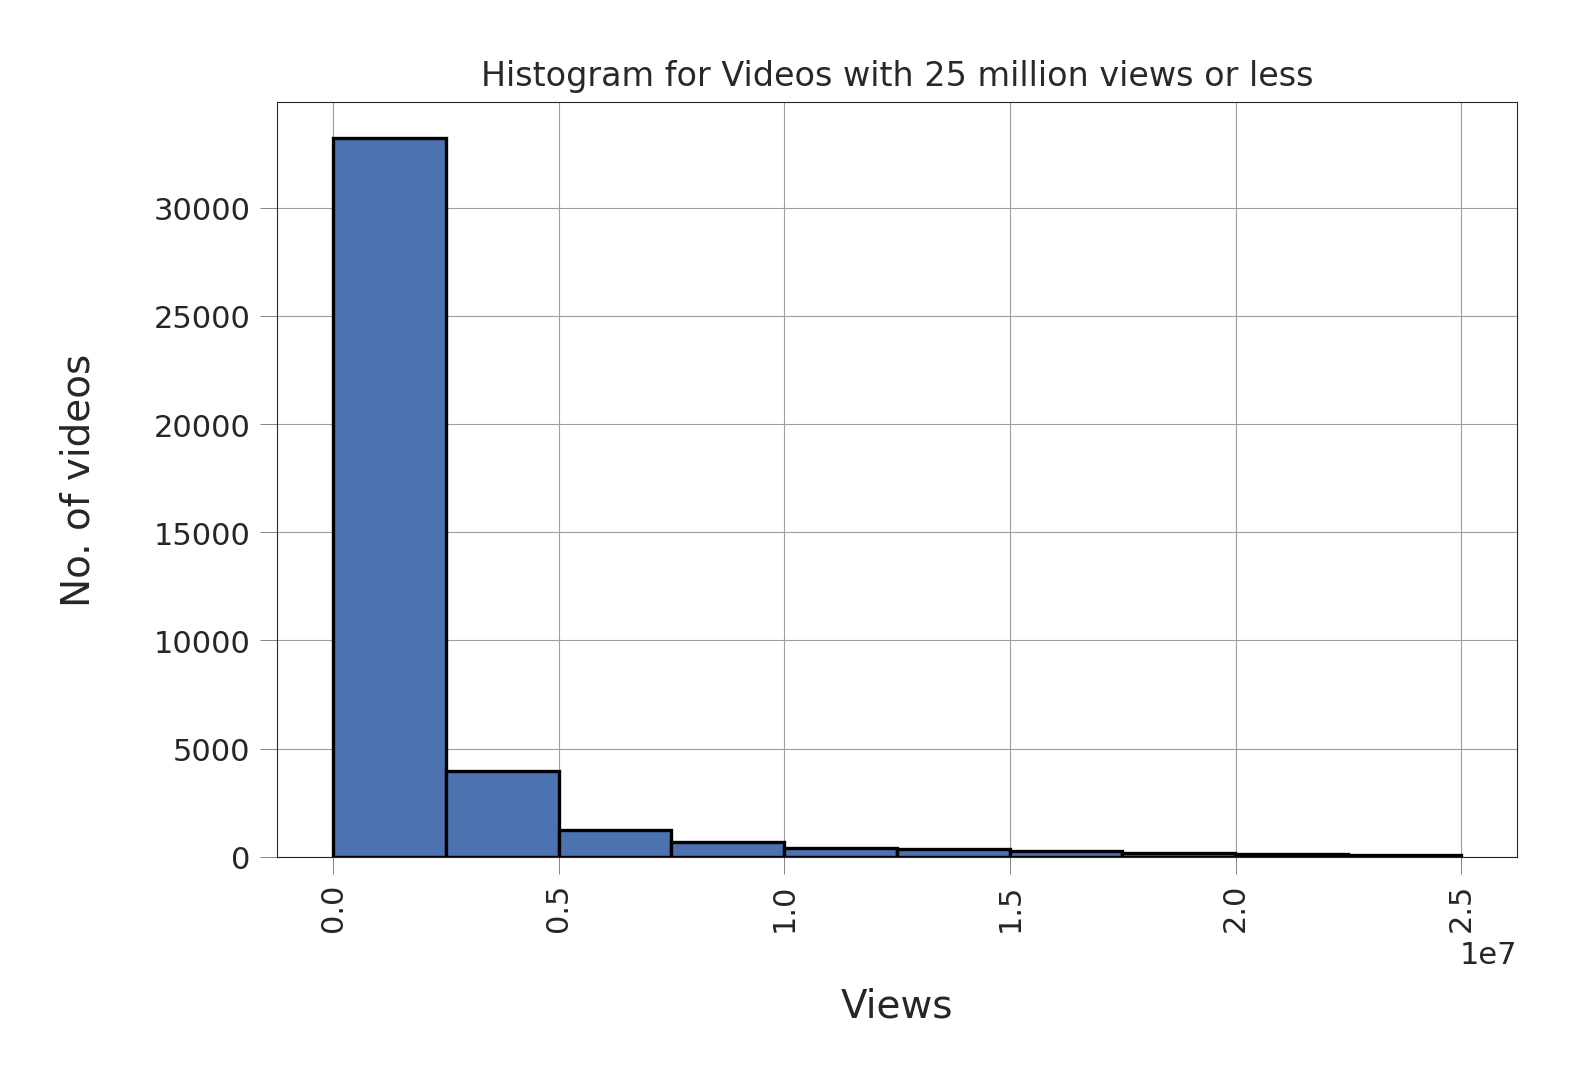

In [586]:
plt.xlabel("Views")
plt.ylabel("No. of videos")
plt.xticks(rotation=90)
plt.hist(df[df['views']<25e6]['views'],edgecolor='black',linewidth=1.2)
plt.title("Histogram for Videos with 25 million views or less")
plt.show()

In [587]:
df[df['views']<1e6]['views'].count()/df['views'].count()*100

60.09426359618062

**Likes histogram**

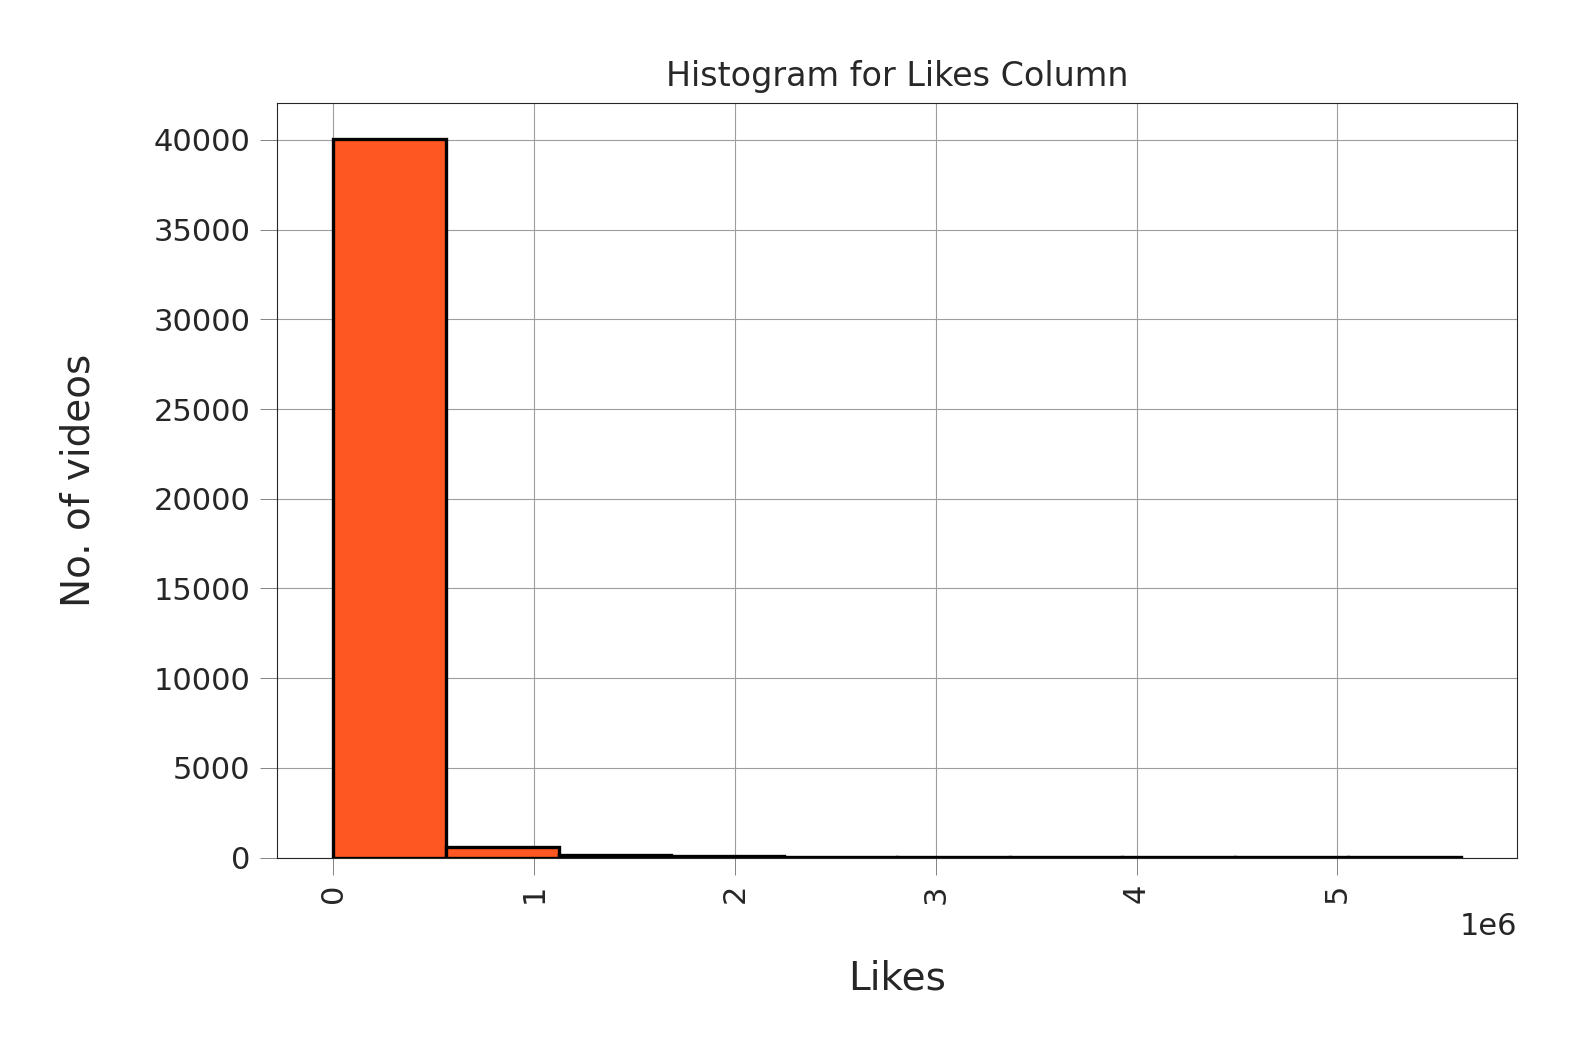

In [588]:
plt.hist(df["likes"],color=PLOT_COLORS[2],edgecolor='black',linewidth=1.2)
plt.xlabel("Likes")
plt.ylabel("No. of videos")
plt.xticks(rotation=90)
plt.title("Histogram for Likes Column")
plt.show()

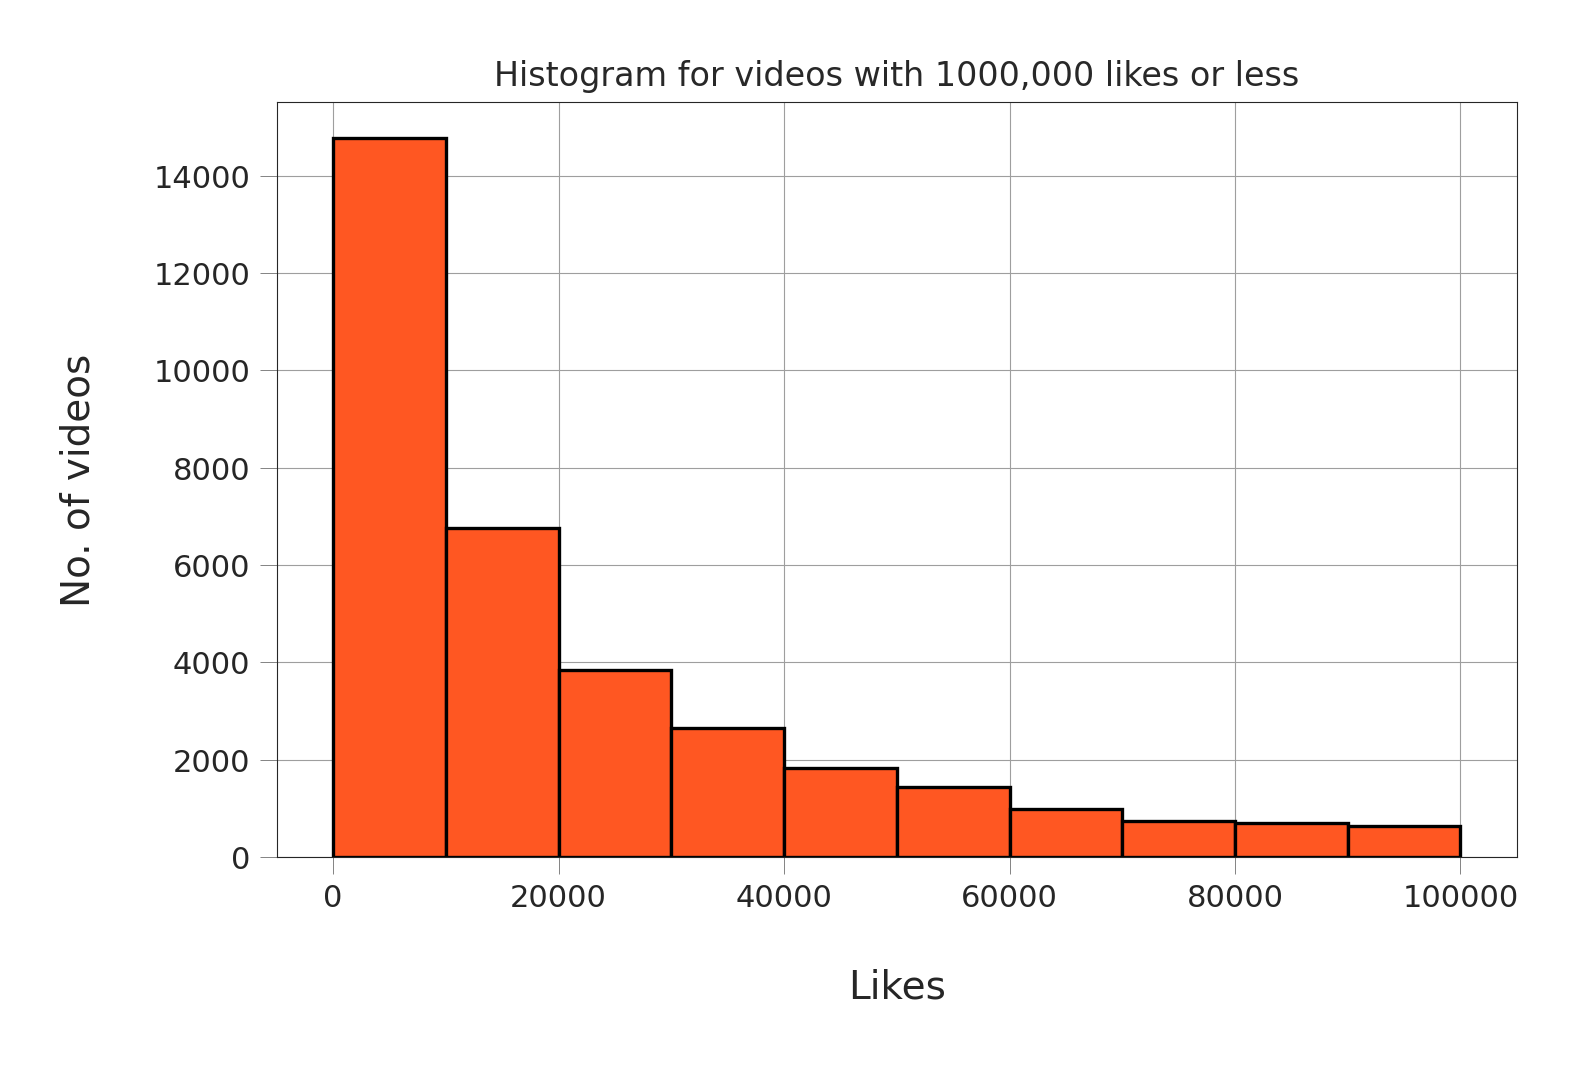

In [589]:
plt.hist(df[df["likes"] <= 1e5]["likes"],color=PLOT_COLORS[2],edgecolor='black',linewidth=1.2)
plt.xlabel("Likes")
plt.ylabel("No. of videos")
plt.title("Histogram for videos with 1000,000 likes or less")
plt.show()

In [590]:
df[df['likes']<4e4]['likes'].count()/df['likes'].count()*100

68.4900730176561

# Comment count histogram

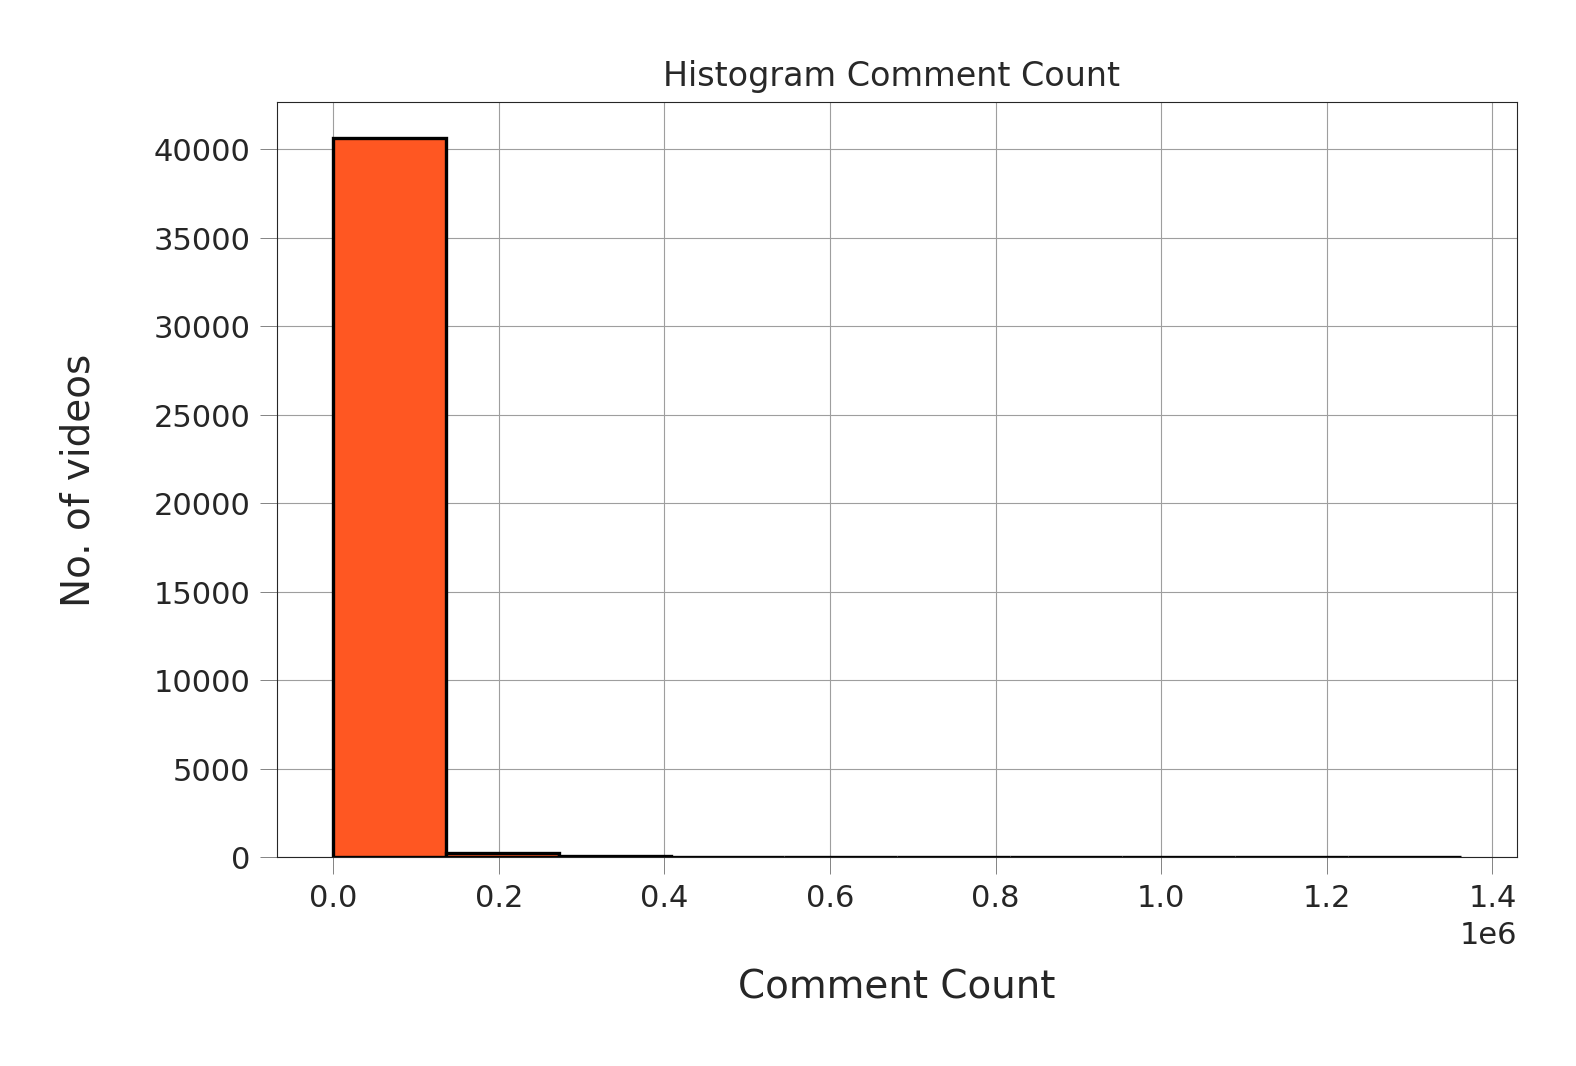

In [591]:
plt.hist(df["comment_count"],color=PLOT_COLORS[2],edgecolor='black',linewidth=1.2)
plt.xlabel("Comment Count")
plt.ylabel("No. of videos")
plt.title("Histogram Comment Count ")
plt.show()

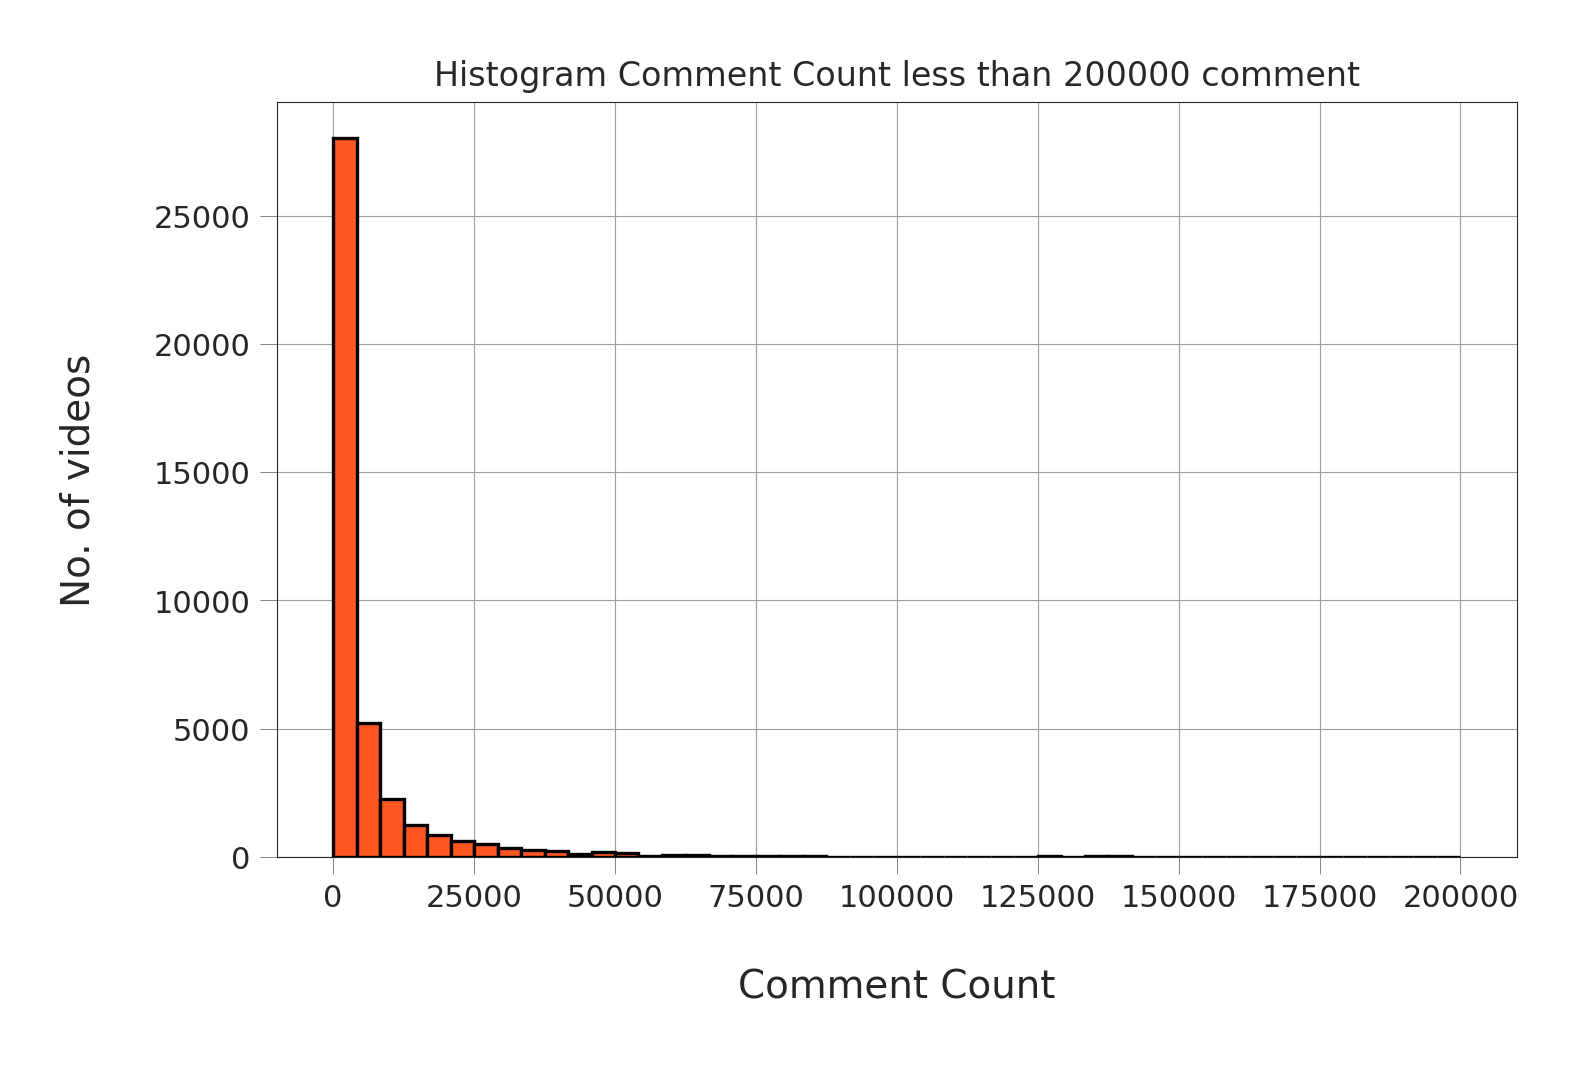

In [592]:
plt.hist(df[df["comment_count"] < 200000]["comment_count"],color=PLOT_COLORS[2],edgecolor='black',linewidth=1.2, bins=np.linspace(0, 2e5, 49))
plt.xlabel("Comment Count")
plt.ylabel("No. of videos")
plt.title("Histogram Comment Count less than 200000 comment")
plt.show()

In [593]:
df[df['comment_count'] < 4000]['comment_count'].count() / df['comment_count'].count() * 100

67.48882756599673

# How many trending video titles contain capitalized word?

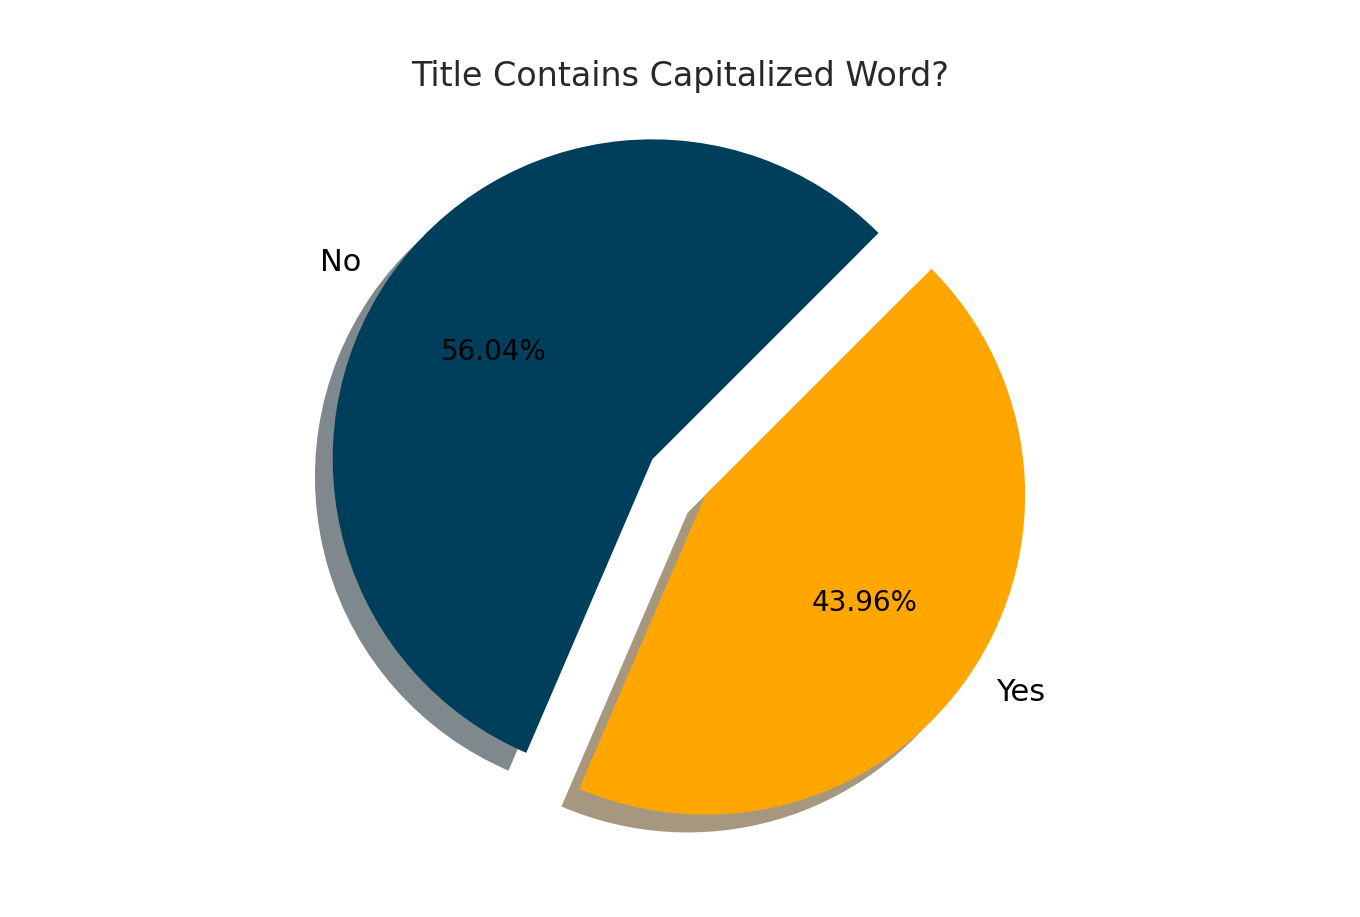

In [594]:
def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False
    
df["contains_capitalized"] = df["title"].apply(contains_capitalized_word)

value_counts = df["contains_capitalized"].value_counts().to_dict()

plt.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
        colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'}, startangle=45, autopct='%1.2f%%',
        shadow=True,explode=(0.1, 0.1))
plt.axis('equal')
plt.title('Title Contains Capitalized Word?')
plt.show()

In [595]:
df["contains_capitalized"].value_counts(normalize=True)

False   0.56
True    0.44
Name: contains_capitalized, dtype: float64

# Video title lengths

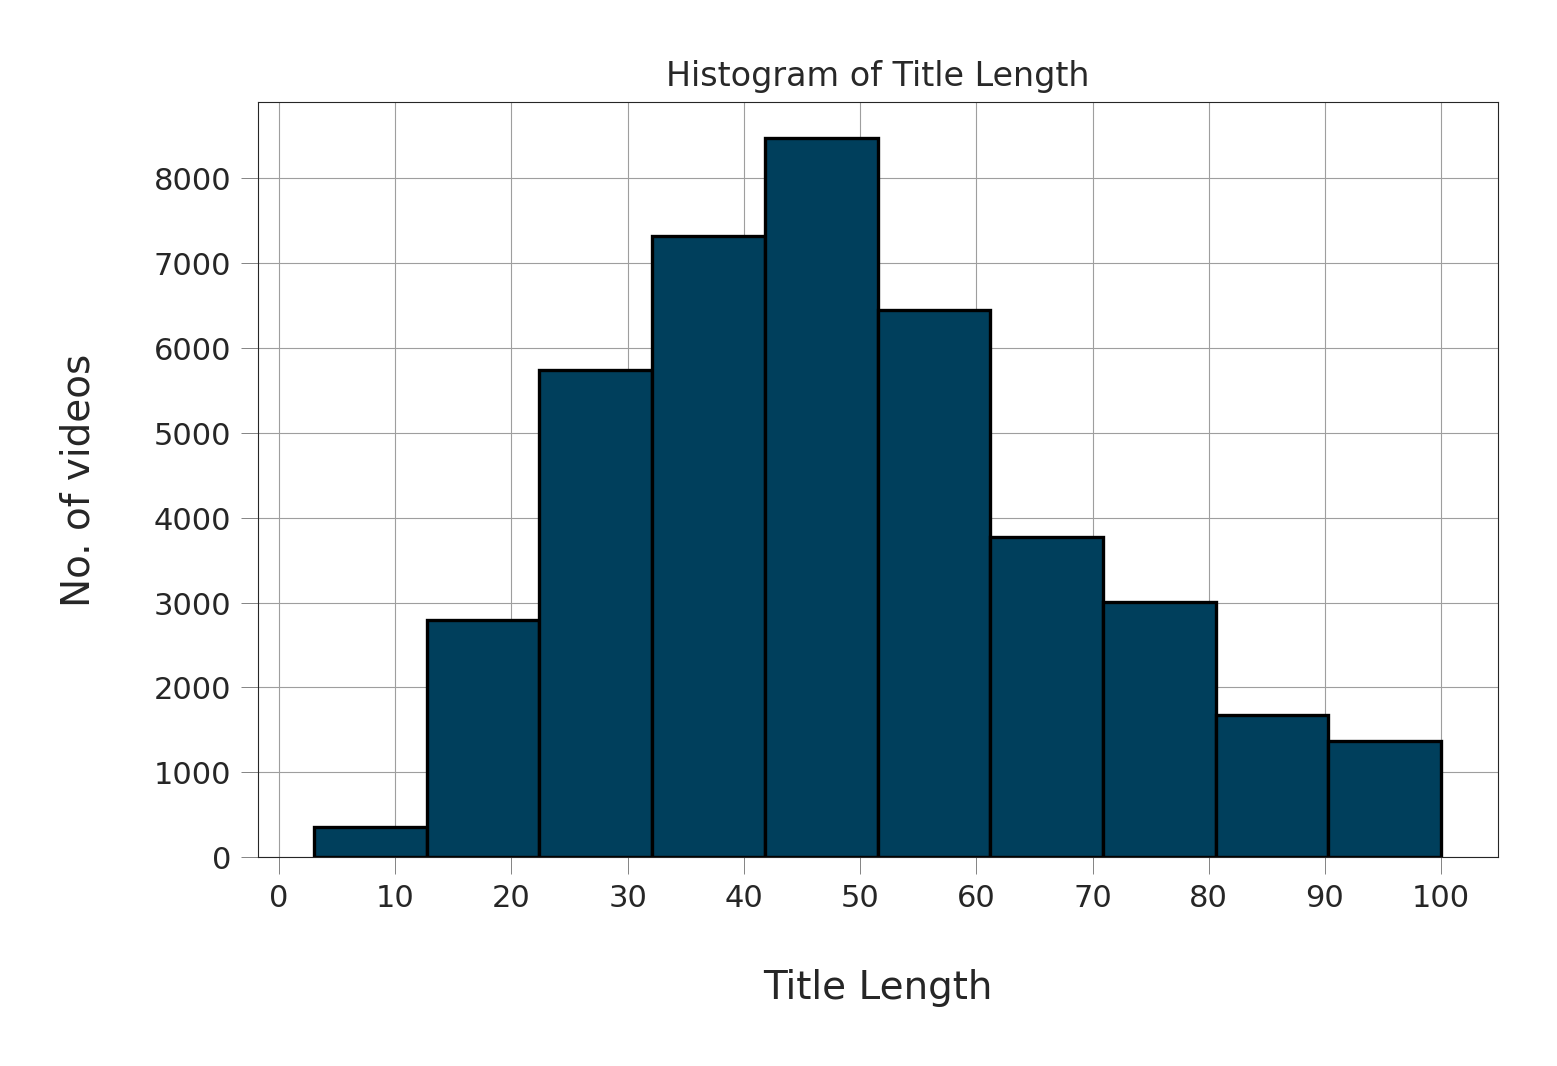

In [596]:
df["title_length"] = df["title"].apply(lambda x: len(x))
plt.hist(df["title_length"],color=PLOT_COLORS[4],edgecolor='black',linewidth=1.2)
plt.xlabel("Title Length")
plt.ylabel("No. of videos")
plt.xticks(range(0, 110, 10))
plt.title("Histogram of Title Length")
plt.show()

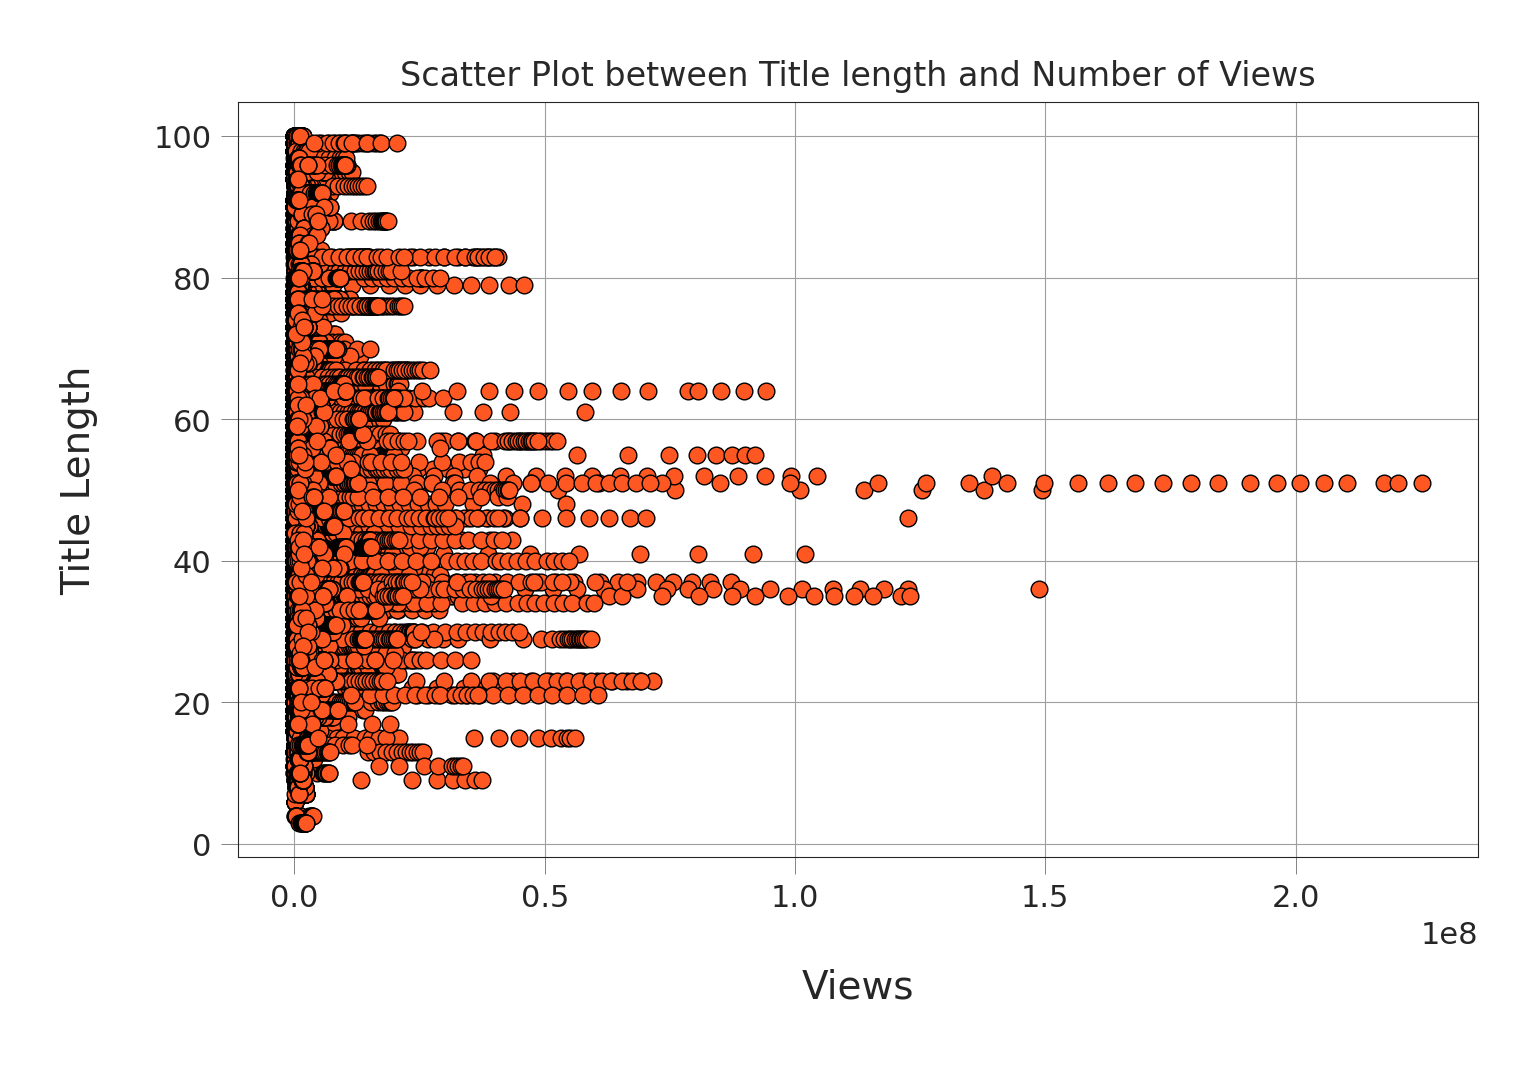

In [597]:
plt.scatter(x=df['views'], y=df['title_length'], edgecolors='#000000', linewidths=0.5,color=PLOT_COLORS[2])
plt.xlabel("Views")
plt.ylabel("Title Length")
plt.title("Scatter Plot between Title length and Number of Views")
plt.show()

# Correlation between dataset variables

In [598]:
df.corr()

,views,likes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,contains_capitalized,title_length
views,1.00,0.85,0.62,0.00,0.02,-0.00,-0.03,-0.04
likes,0.85,1.00,0.80,-0.03,-0.02,-0.00,-0.00,-0.08
comment_count,0.62,0.80,1.00,-0.03,-0.01,-0.00,0.02,-0.07
comments_disabled,0.00,-0.03,-0.03,1.00,0.32,-0.00,0.01,0.03
ratings_disabled,0.02,-0.02,-0.01,0.32,1.00,-0.00,0.00,0.00
video_error_or_removed,-0.00,-0.00,-0.00,-0.00,-0.00,1.00,-0.02,-0.01
contains_capitalized,-0.03,-0.00,0.02,0.01,0.00,-0.02,1.00,0.13
title_length,-0.04,-0.08,-0.07,0.03,0.00,-0.01,0.13,1.00


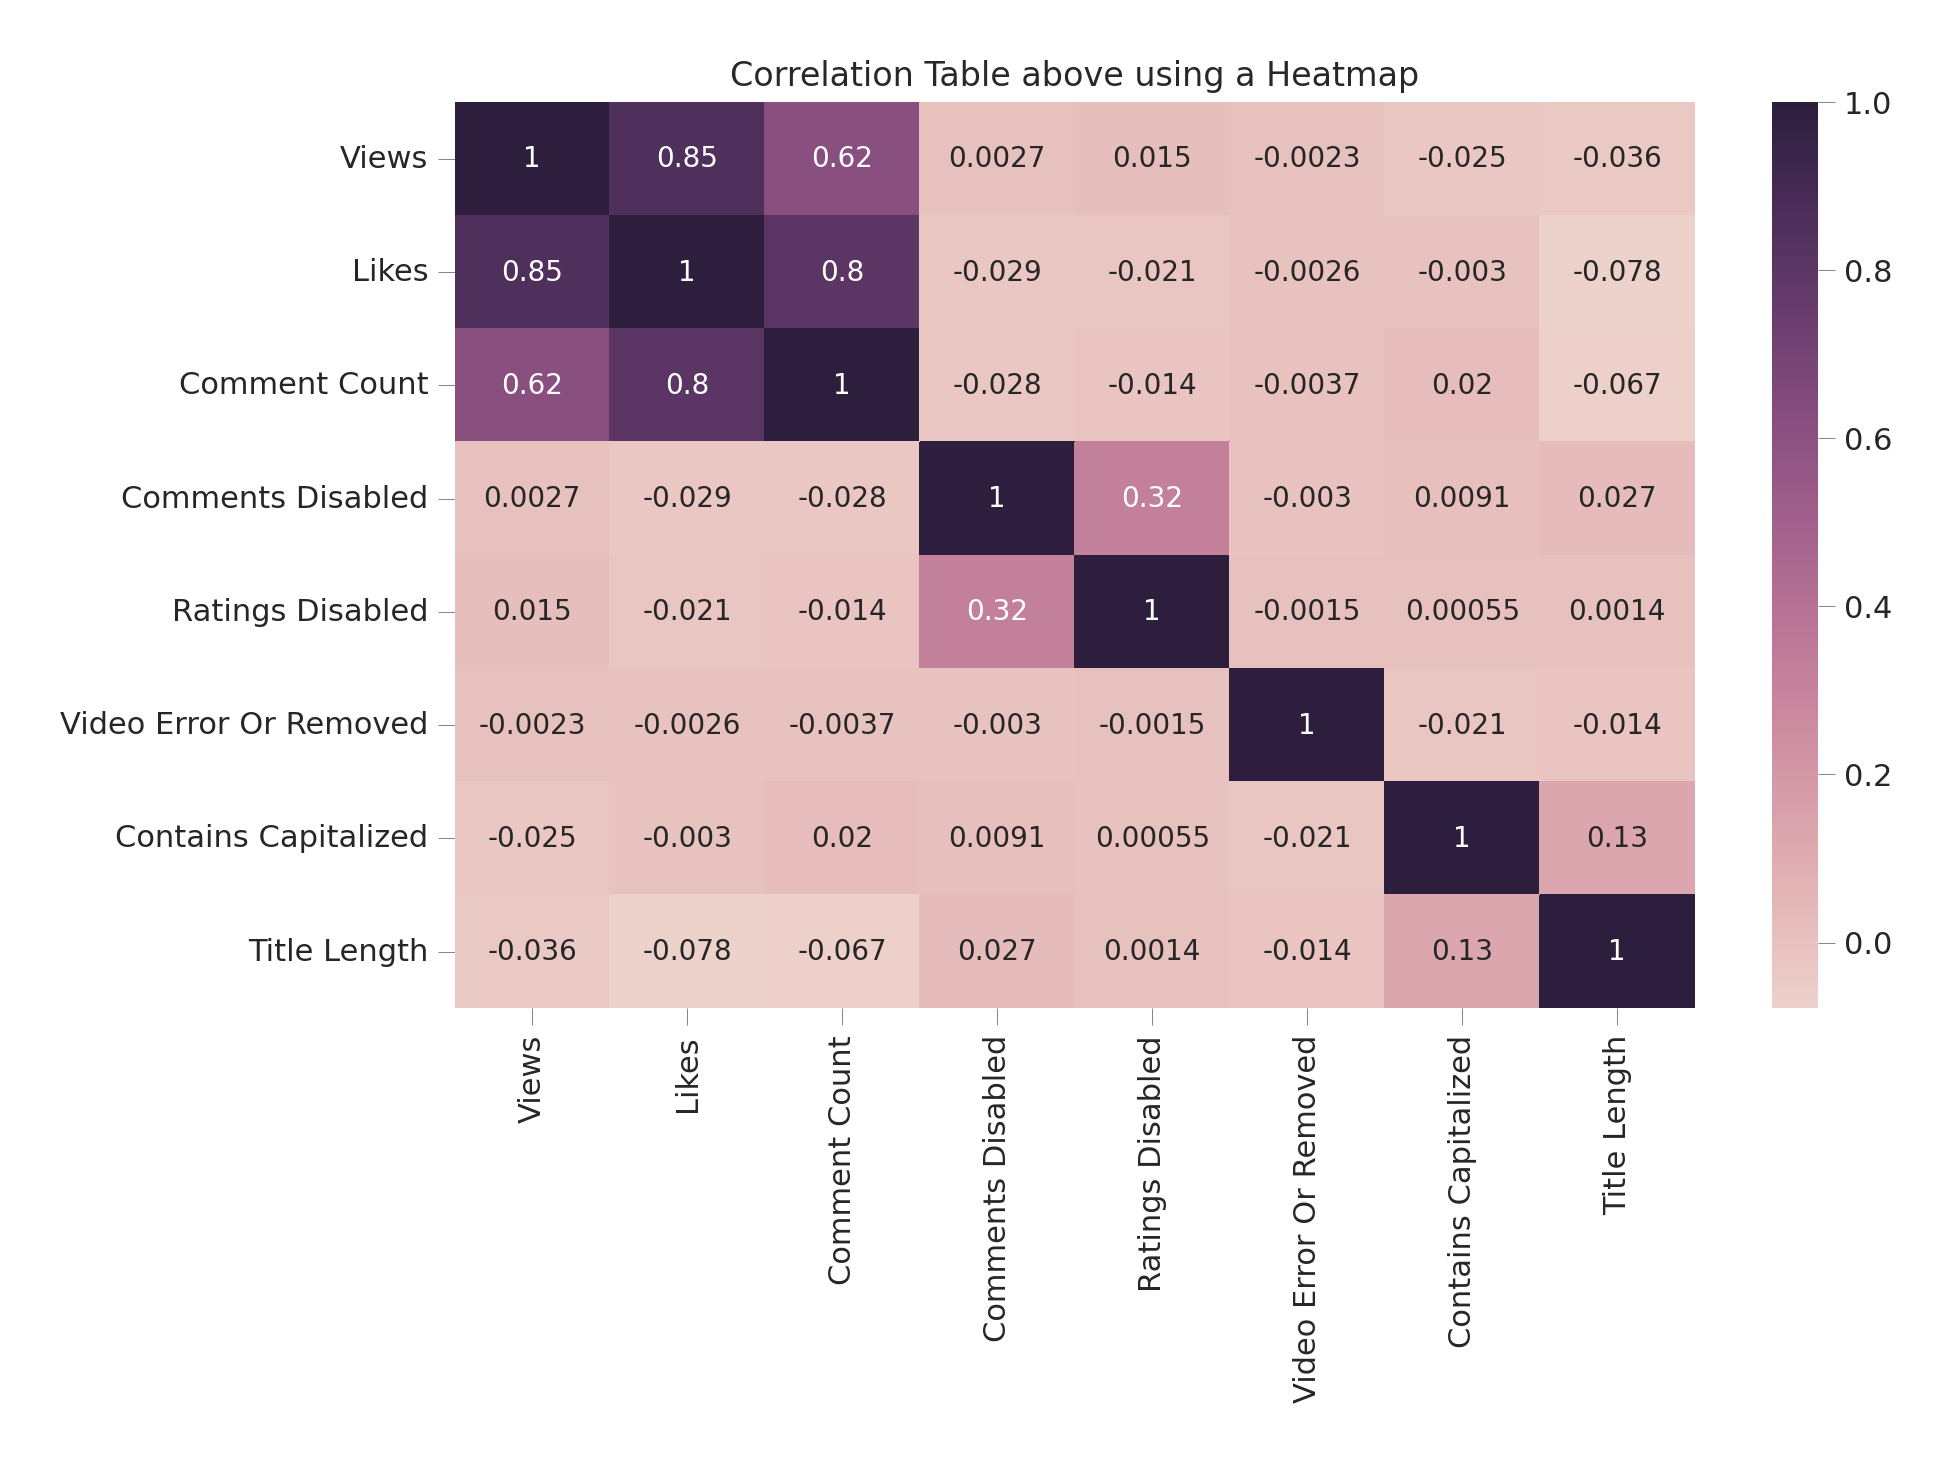

In [599]:
h_labels = [x.replace('_', ' ').title() for x in 
            list(df.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(10,6))
_ = sns.heatmap(df.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, 
                cmap=sns.cubehelix_palette(as_cmap=True), ax=ax).set_title('Correlation Table above using a Heatmap')

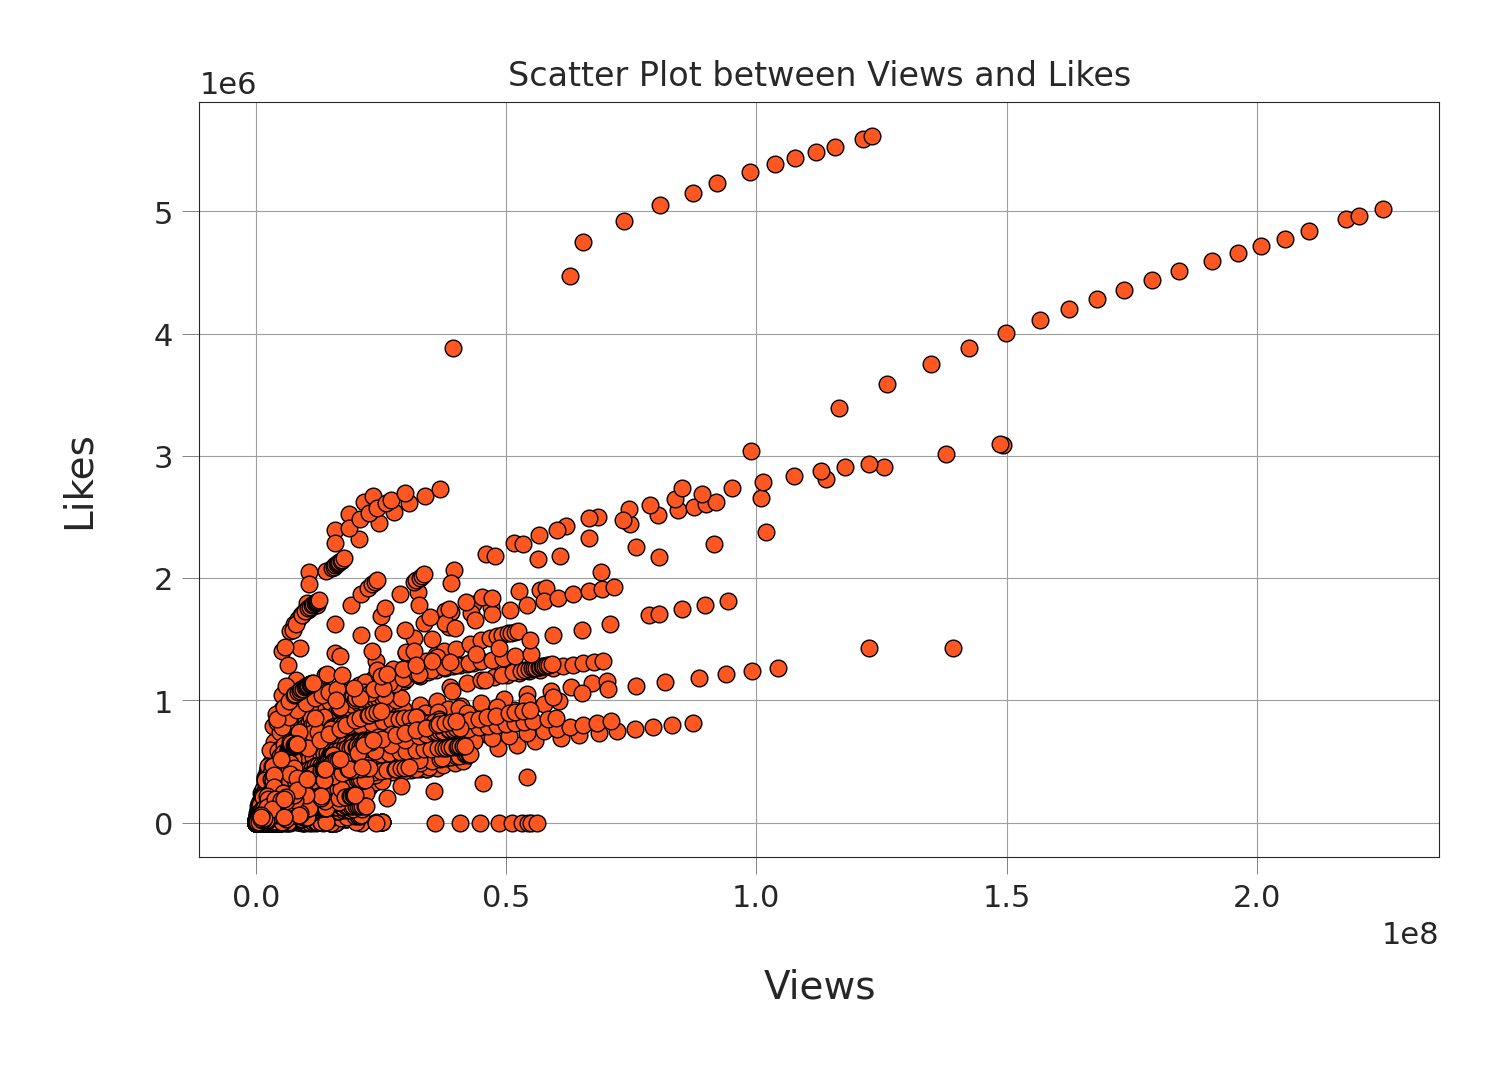

In [600]:
plt.scatter(x=df['views'], y=df['likes'], edgecolors='#000000', linewidths=0.5,color=PLOT_COLORS[2])
plt.xlabel("Views")
plt.ylabel("Likes")
plt.title("Scatter Plot between Views and Likes")
plt.show()

# Most common words in video titles

In [601]:
title_words = list(df["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(25)

[('-', 11452),
 ('|', 10663),
 ('The', 5762),
 ('the', 3610),
 ('a', 2566),
 ('to', 2343),
 ('of', 2338),
 ('in', 2176),
 ('A', 2122),
 ('&', 2024),
 ('I', 1940),
 ('and', 1917),
 ('Video)', 1901),
 ('Trailer', 1868),
 ('How', 1661),
 ('with', 1655),
 ('2018', 1613),
 ('(Official', 1594),
 ('Official', 1554),
 ('on', 1552),
 ('To', 1397),
 ('You', 1254),
 ('My', 1080),
 ('for', 1020),
 ('ft.', 1017)]

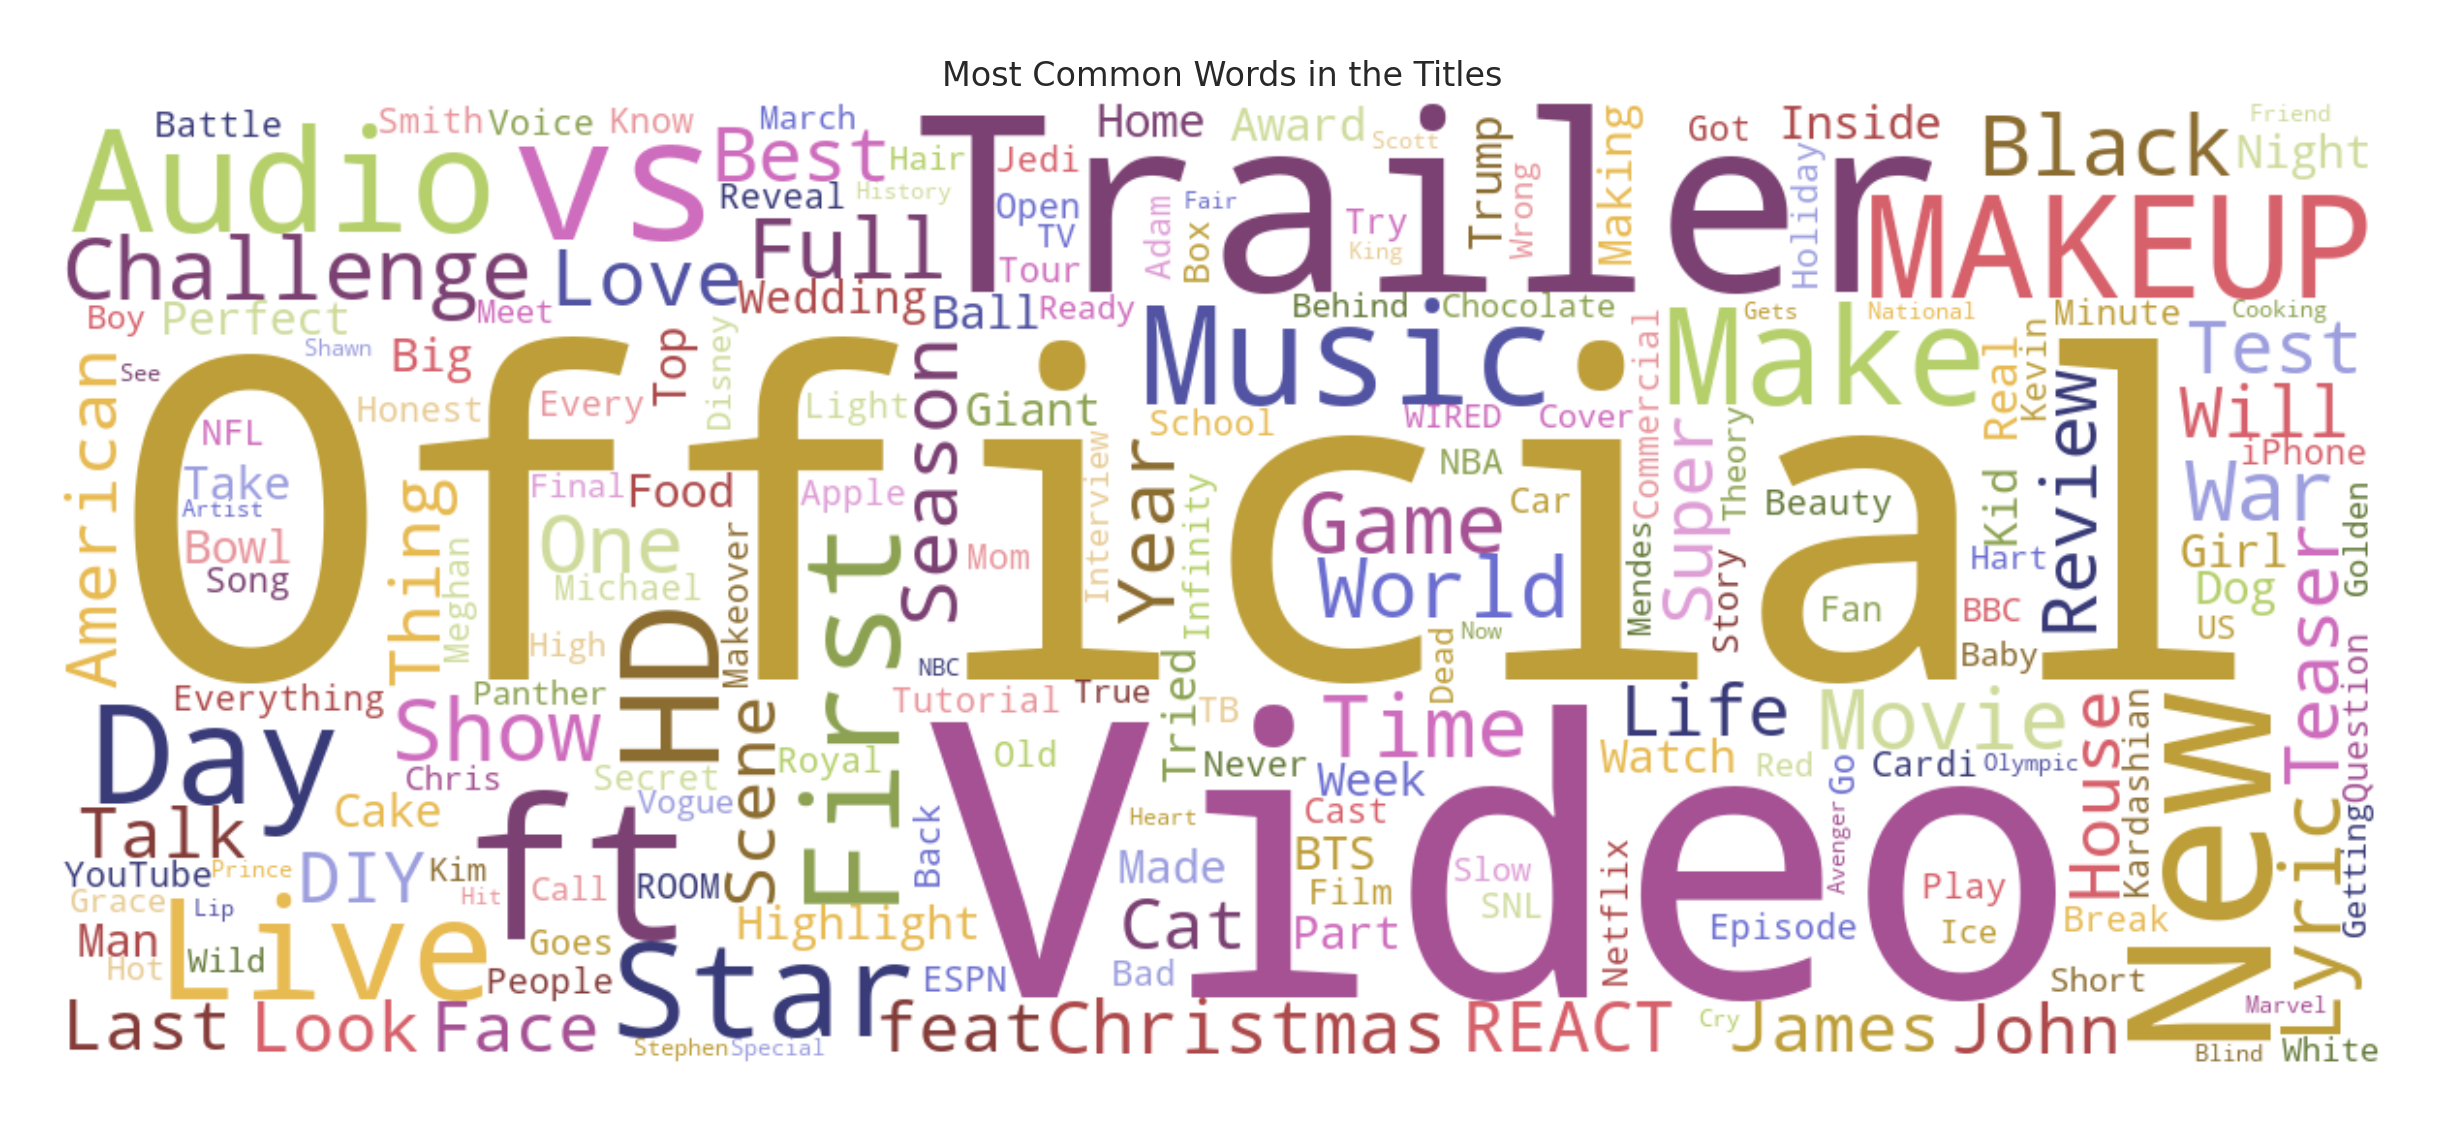

In [602]:
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")
_=plt.title("Most Common Words in the Titles")

# Which channels have the largest number of trending videos?

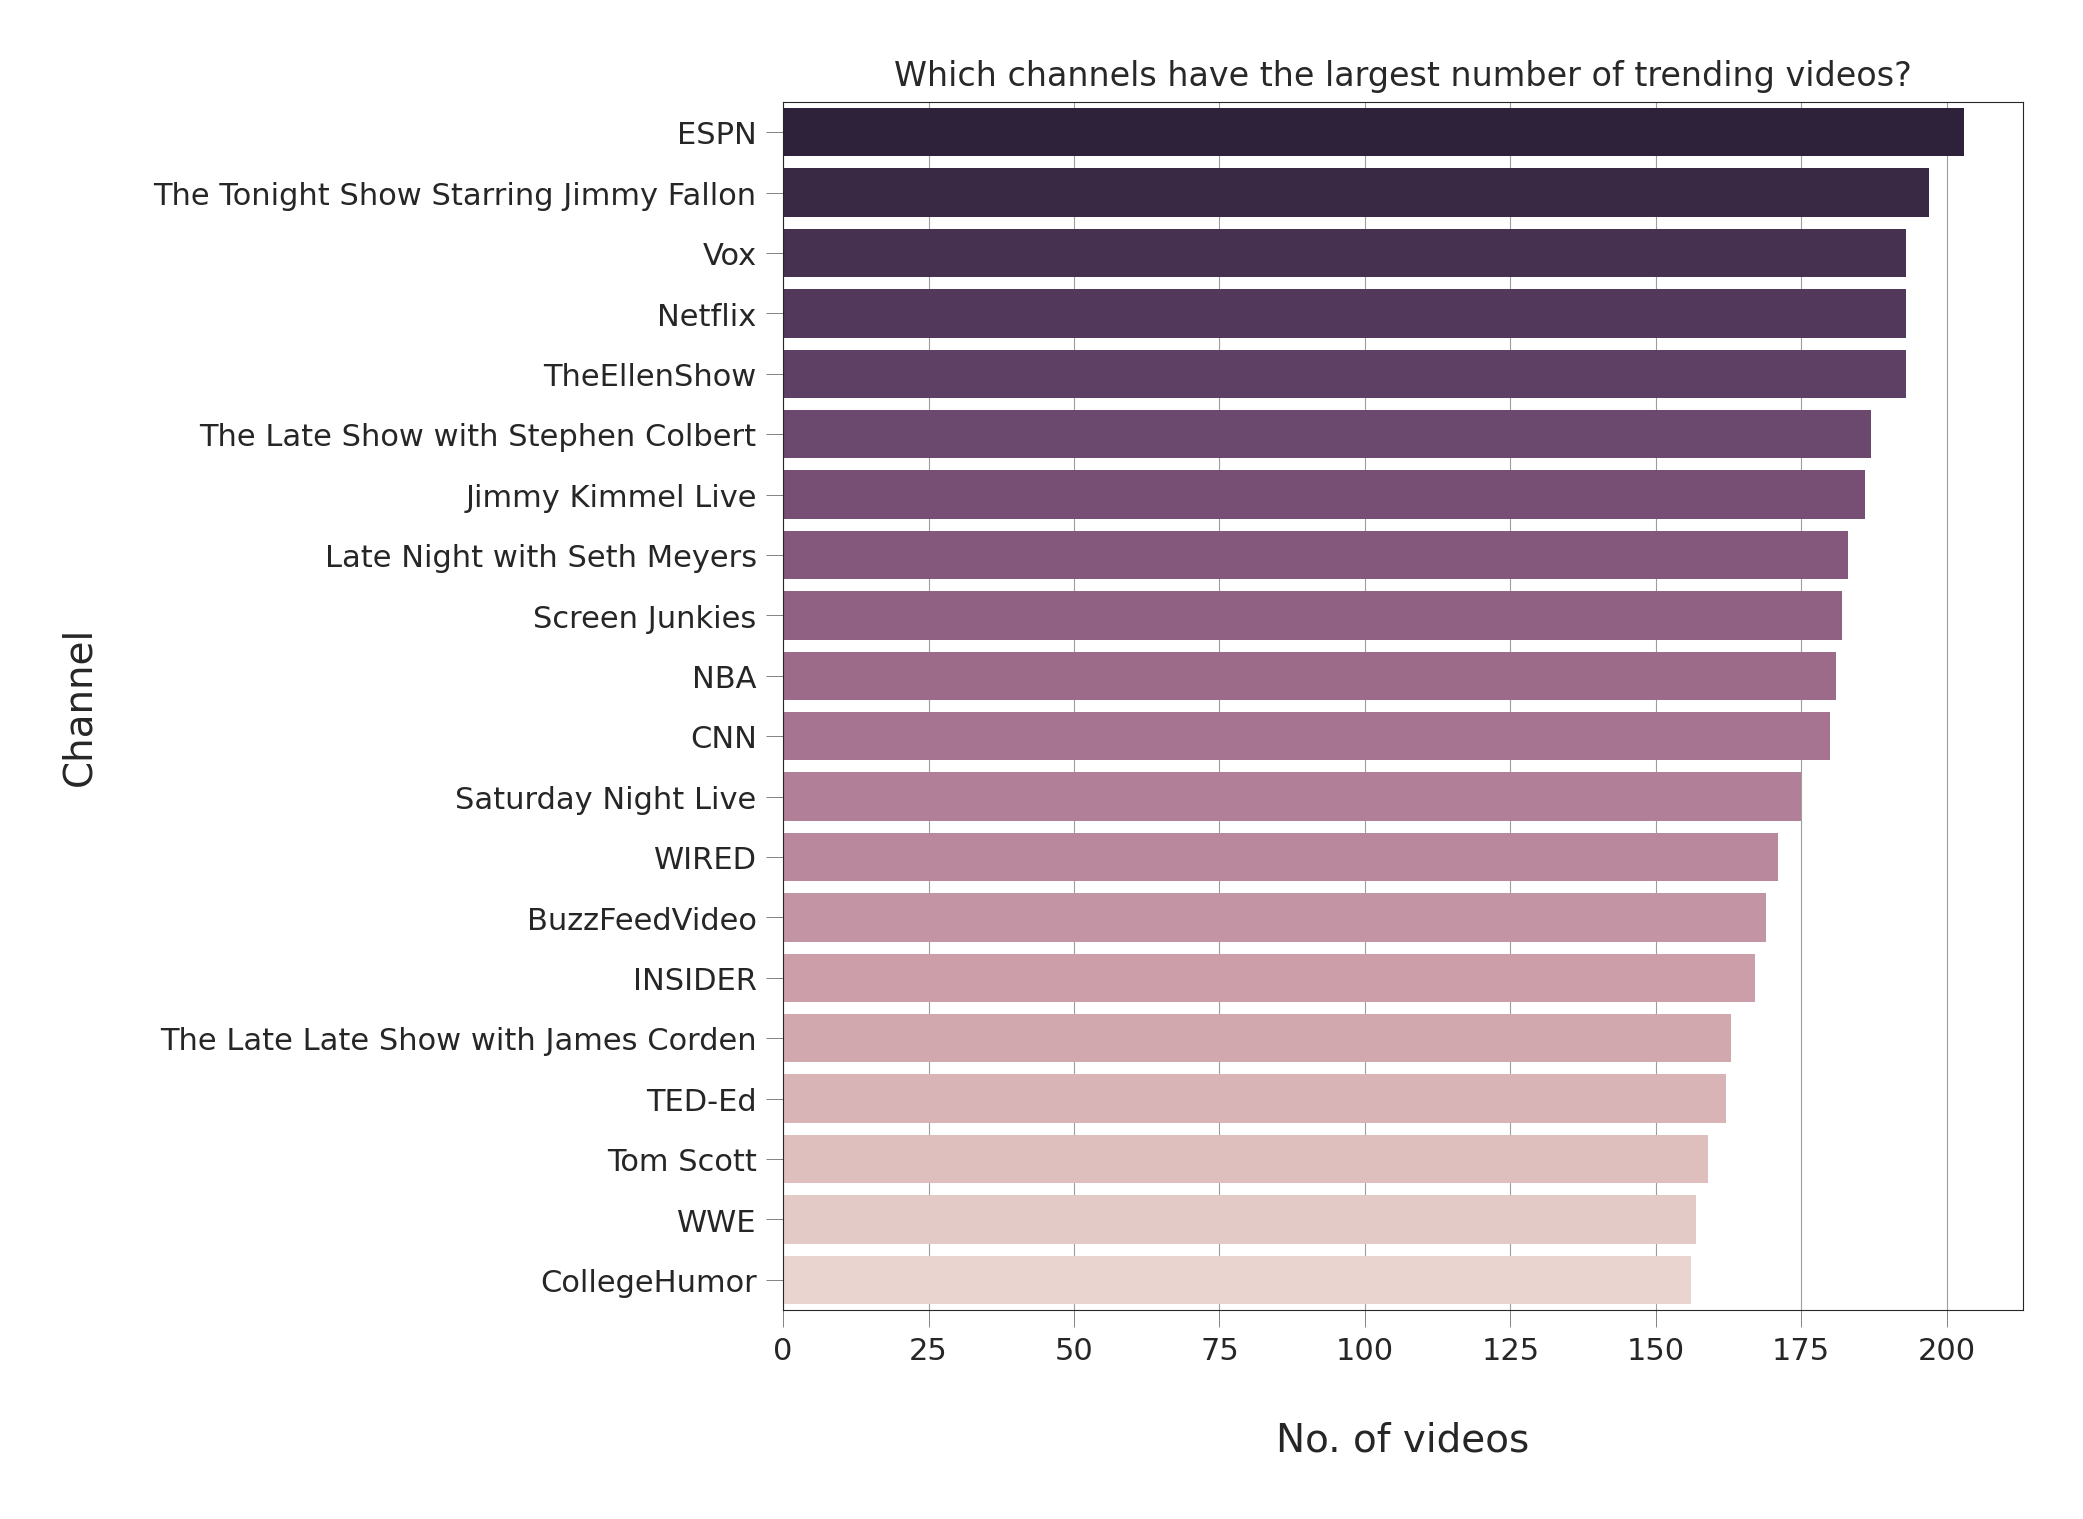

In [603]:
cdf = df.groupby("channel_title").size().reset_index(name="video_count").sort_values("video_count", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8,8))
_ = sns.barplot(x="video_count", y="channel_title", data=cdf,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
_ = ax.set(xlabel="No. of videos", ylabel="Channel")
_= ax.set_title("Which channels have the largest number of trending videos?")

# Trending videos and their publishing time

In [604]:
df["publishing_day"] = df["publish_time"].apply(
    lambda x: datetime.datetime.strptime(x[:10], "%Y-%m-%d").date().strftime('%a'))
df["publishing_hour"] = df["publish_time"].apply(lambda x: x[11:13])

In [605]:
df.drop(labels='publish_time', axis=1, inplace=True)
print(df["publishing_day"].head(5))
print(df["publishing_hour"].head(5))

0    Mon
1    Mon
2    Sun
3    Mon
4    Sun
Name: publishing_day, dtype: object
0    17
1    07
2    19
3    11
4    18
Name: publishing_hour, dtype: object


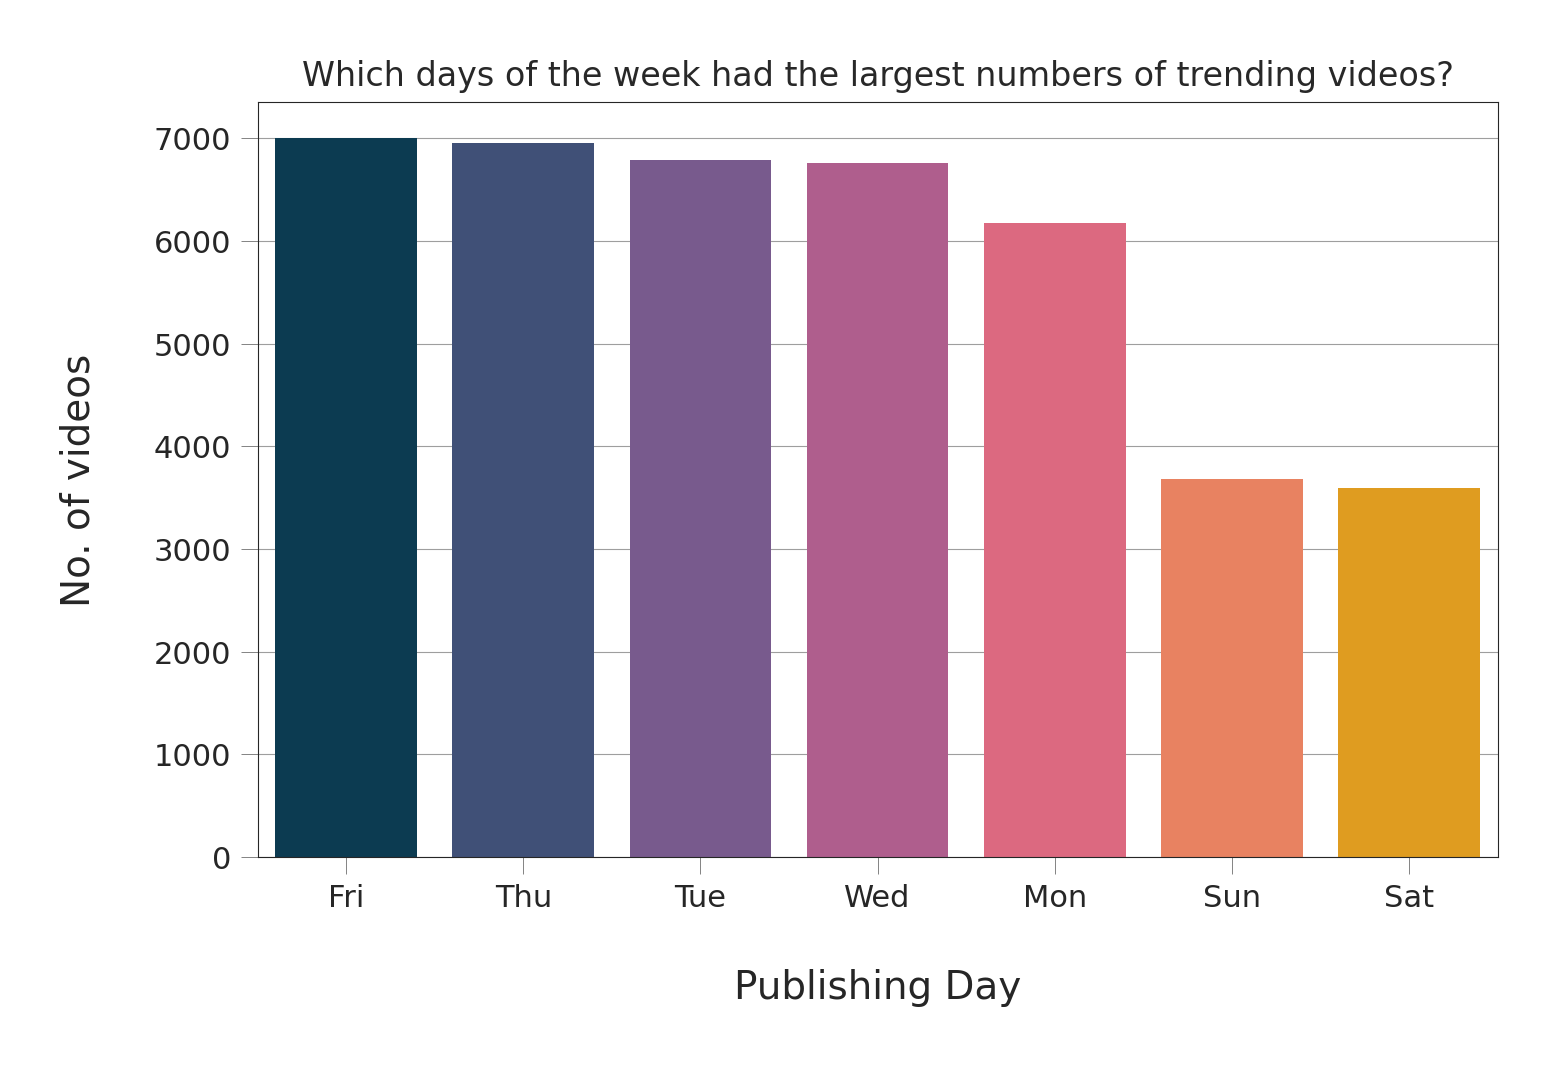

In [606]:
cdf = df["publishing_day"].value_counts()\
        .to_frame().reset_index()\
        .rename(columns={"index": "publishing_day", "publishing_day": "No_of_videos"})
fig, ax = plt.subplots()
_ = sns.barplot(x="publishing_day", y="No_of_videos", data=cdf, 
                palette=sns.color_palette(['#003f5c', '#374c80', '#7a5195', 
                                           '#bc5090', '#ef5675', '#ff764a', '#ffa600'],
                                          n_colors=7), ax=ax)
_ = ax.set(xlabel="Publishing Day", ylabel="No. of videos")
_= ax.set_title("Which days of the week had the largest numbers of trending videos?")

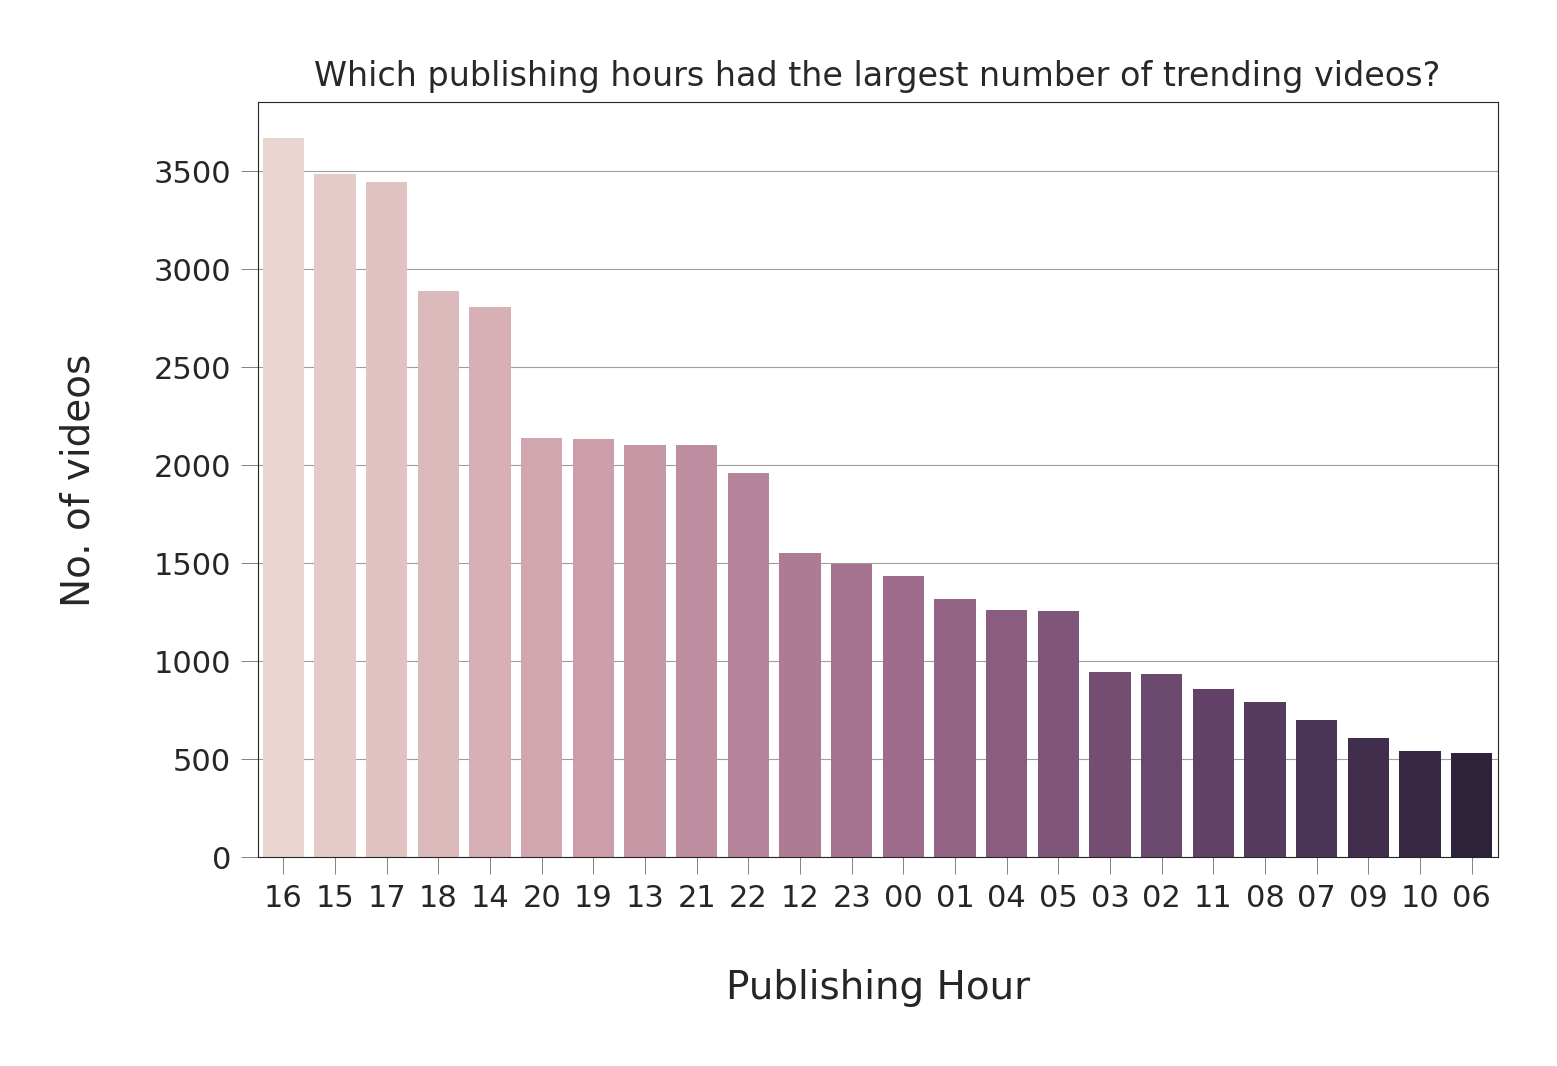

In [607]:
cdf = df["publishing_hour"].value_counts().to_frame().reset_index()\
        .rename(columns={"index": "publishing_hour", "publishing_hour": "No_of_videos"})
fig, ax = plt.subplots()
_ = sns.barplot(x="publishing_hour", y="No_of_videos", data=cdf, 
                palette=sns.cubehelix_palette(n_colors=24), ax=ax)
_ = ax.set(xlabel="Publishing Hour", ylabel="No. of videos")
_= ax.set_title("Which publishing hours had the largest number of trending videos?")

# How many trending videos have an error?

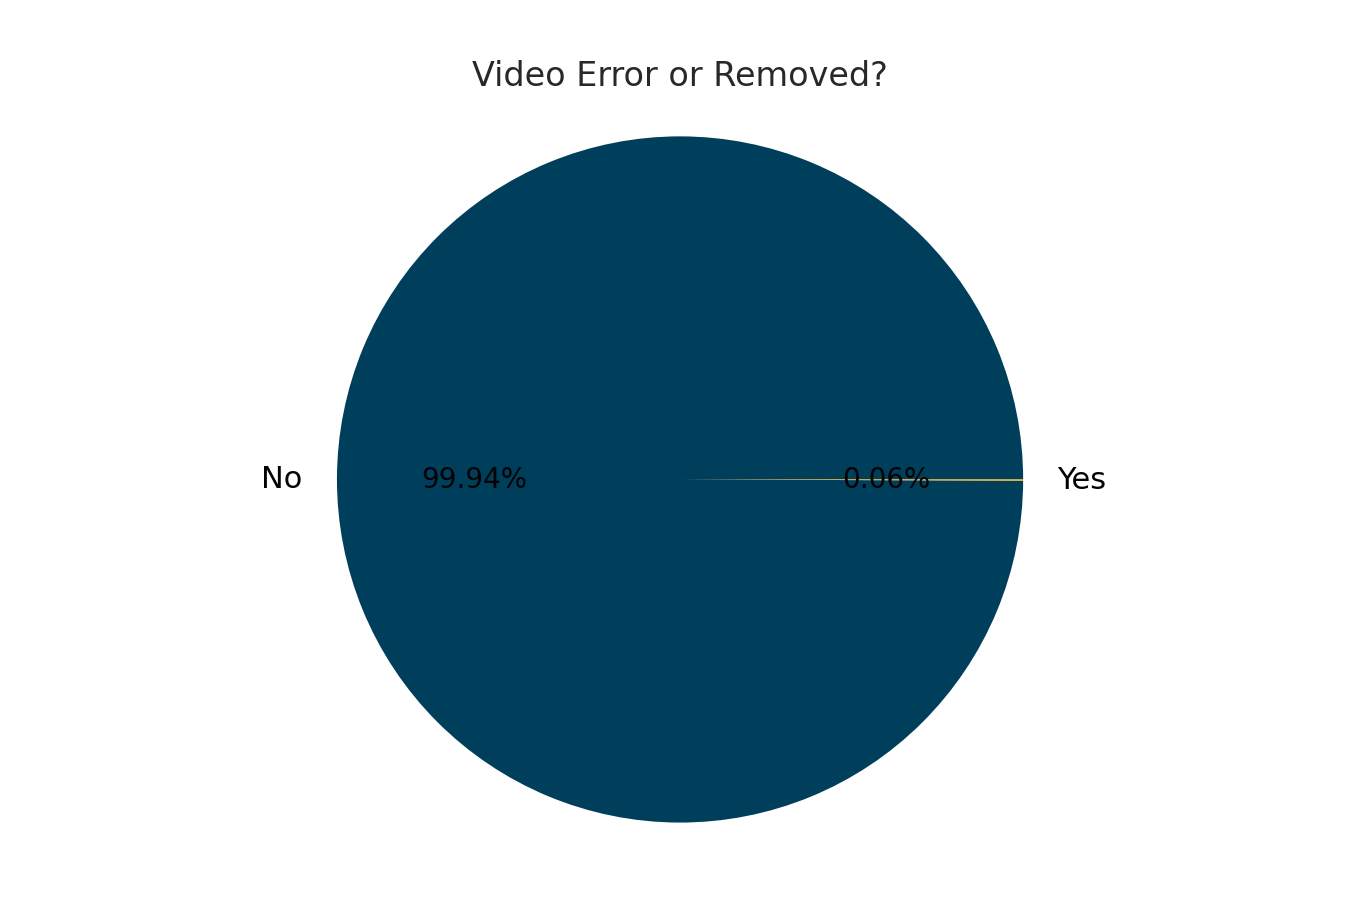

In [608]:
value_counts = df["video_error_or_removed"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
        colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'}, autopct='%1.2f%%')
_ = ax.axis('equal')
_ = ax.set_title('Video Error or Removed?')

In [609]:
df["video_error_or_removed"].value_counts()

False    40926
True        23
Name: video_error_or_removed, dtype: int64

# How many trending videos have their comments disabled?

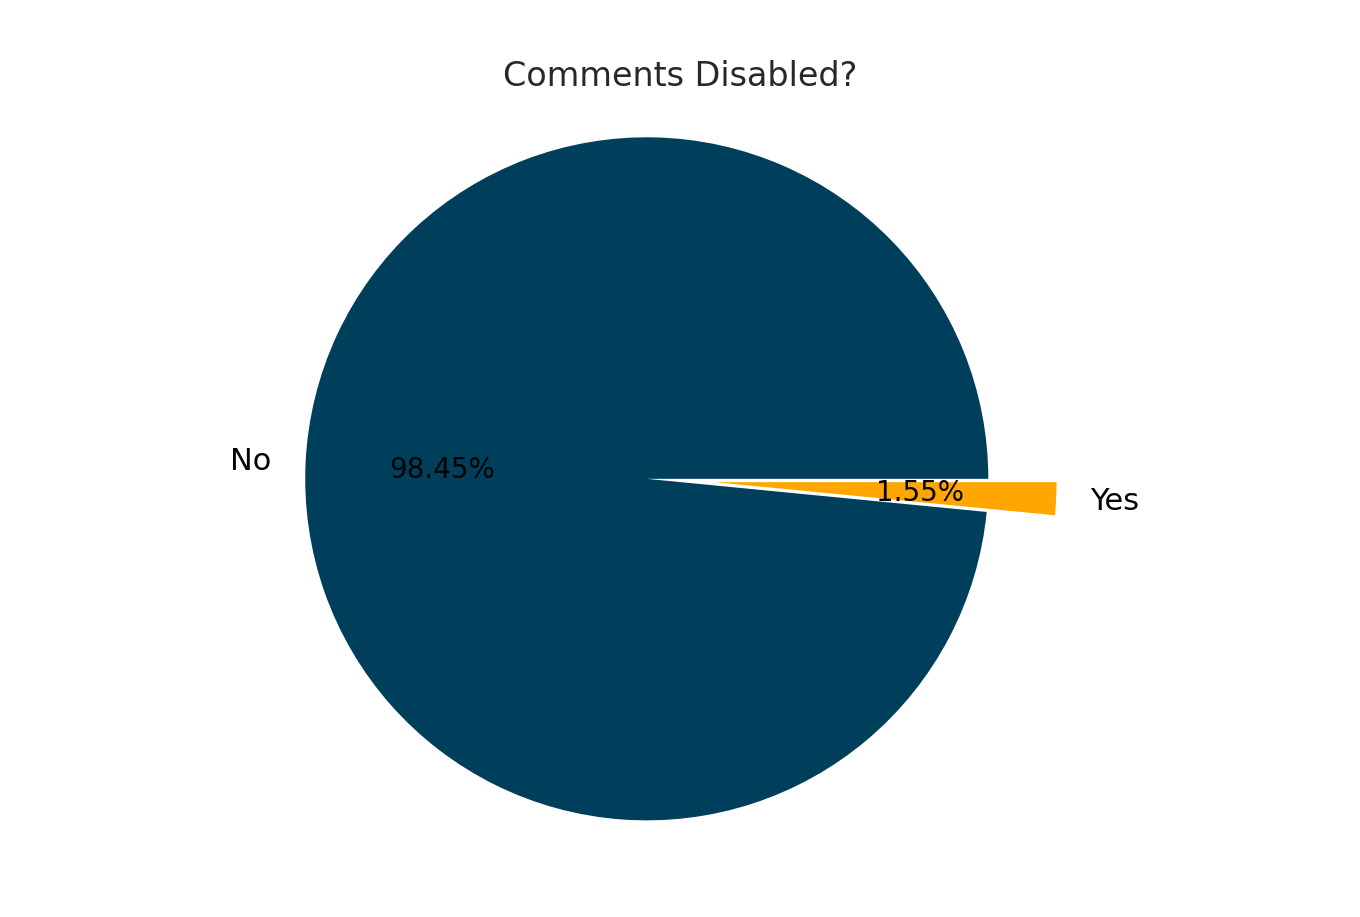

In [610]:
value_counts = df["comments_disabled"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie(x=[value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'},autopct='%1.2f%%',
        explode=(0.1, 0.1))
_ = ax.axis('equal')
_ = ax.set_title('Comments Disabled?')

In [611]:
df["comments_disabled"].value_counts(normalize=True)

False   0.98
True    0.02
Name: comments_disabled, dtype: float64

# How many trending videos have their ratings disabled?

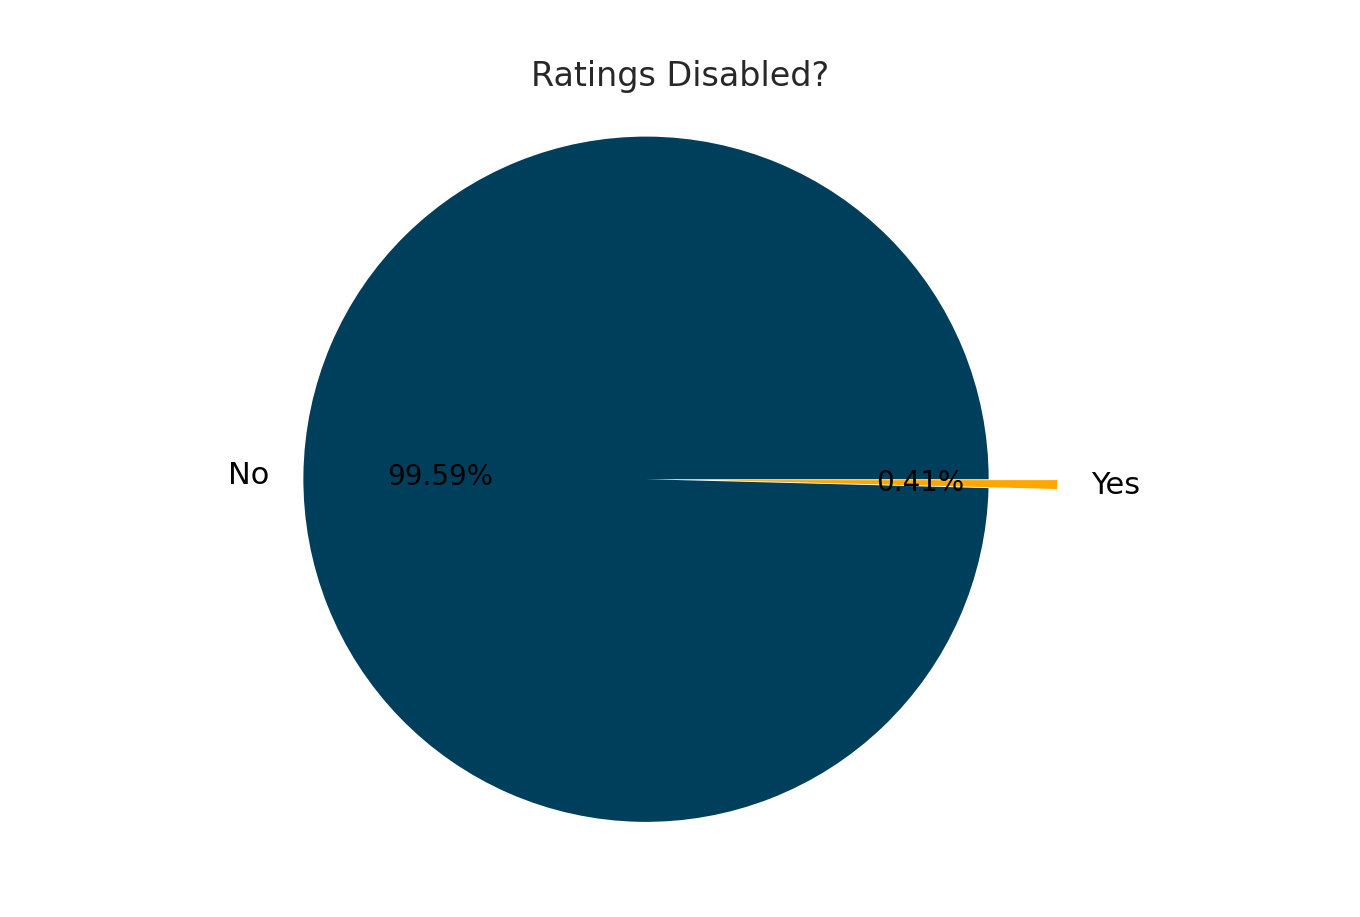

In [612]:
value_counts = df["ratings_disabled"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
            colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'},autopct='%1.2f%%',
        explode=(0.1, 0.1))
_ = ax.axis('equal')
_ = ax.set_title('Ratings Disabled?')


In [613]:
df["ratings_disabled"].value_counts()

False    40780
True       169
Name: ratings_disabled, dtype: int64

# How many videos have both comments and ratings disabled?

In [614]:
len(df[(df["comments_disabled"] == True) & (df["ratings_disabled"] == True)].index)

106

# Conclusions
Here are the some of the results we extracted from the analysis:

* We analyzed a dataset that contains information about YouTube trending videos for 205 days. The dataset was collected in 2017 and 2018. It contains 40949 video entry.
* 71% of trending videos have less than 1.5 million views, and 91% have less than 5 million views.
* 68% of trending videos have less than 40,000 likes, and 84% have less than 100,000 likes.
* 67% of trending videos have less than 4,000 comments, and 93% have less than 25,000 comments.
* Trending videos that have 100,000,000 views and more have title length between 33 and 55 characters approximately.
* The words 'Official', 'Video', 'Trailer', 'How', and '2018' were common also in trending video titles.
* There is a strong positive correlation between the number of views and the number of likes of trending videos: As one of them increases, the other increases, and vice versa.
* There is a strong positive correlation also between the number of likes and the number of comments, and a slightly weaker one between the number of dislikes and the number of comments.